In [1]:
import math

initial_coef = np.array([1.0, 1.0, 1.0],  dtype=np.float64)
print("Initial structure: a   = %f,   b = %f,   c = %f" %
      (initial_coef[0], initial_coef[1], initial_coef[2]))

parabola_arg = np.array([1.0, 2.0, 3.0],  dtype=np.float64)
print("Initial arguments: x_1 = %f, x_2 = %f, x_3 = %f" %
      (parabola_arg[0], parabola_arg[1], parabola_arg[2]))


def parabola(x):
    return initial_coef[0]*(x**2) + initial_coef[1]*x + initial_coef[2]


candidates = np.array([parabola(parabola_arg[0]), parabola(
    parabola_arg[1]), parabola(parabola_arg[2])],  dtype=np.float64)
print("Initial parabola value: d_1 = %f, d_2 = %f, d_3 = %f" %
      (candidates[0], candidates[1], candidates[2]))
parabola_coefficients = {'a': 0.0, 'b': 0.0, 'c': 0.0}
# print(parabola_arg)
denominator = \
    parabola_arg[0] * np.power(parabola_arg[1], 2) - np.power(parabola_arg[0], 2) * parabola_arg[1] \
    - parabola_arg[0] * np.power(parabola_arg[2], 2) + parabola_arg[1] * np.power(parabola_arg[2], 2) \
    + np.power(parabola_arg[0], 2) * parabola_arg[2] - \
    np.power(parabola_arg[1], 2) * parabola_arg[2]

parabola_coefficients['a'] = \
    - parabola_arg[1] * candidates[0] + parabola_arg[2] * candidates[0] \
    + parabola_arg[0] * candidates[1] - parabola_arg[2] * candidates[1] \
    - parabola_arg[0] * candidates[2] + parabola_arg[1] * candidates[2]

parabola_coefficients['b'] = \
    np.power(parabola_arg[1], 2) * candidates[0] - np.power(parabola_arg[2], 2) * candidates[0] \
    - np.power(parabola_arg[0], 2) * candidates[1] + np.power(parabola_arg[2], 2) * candidates[1] \
    + np.power(parabola_arg[0], 2) * candidates[2] - \
    np.power(parabola_arg[1], 2) * candidates[2]

parabola_coefficients['c'] = \
    parabola_arg[1] * np.power(parabola_arg[2], 2) * candidates[0] - np.power(parabola_arg[1], 2) * parabola_arg[2] * candidates[0] \
    - parabola_arg[0] * np.power(parabola_arg[2], 2) * candidates[1] + np.power(parabola_arg[0], 2) * parabola_arg[2] * candidates[1] \
    + parabola_arg[0] * np.power(parabola_arg[1], 2) * candidates[2] - \
    np.power(parabola_arg[0], 2) * parabola_arg[1] * candidates[2]

print("Counted fraction value: a = %f/%f, b = %f/%f, c = %f/%f" %
      (parabola_coefficients['a'], denominator, parabola_coefficients['b'], denominator, parabola_coefficients['c'], denominator))
skip = False
for coef in parabola_coefficients:
    parabola_coefficients[coef] = parabola_coefficients[coef] / denominator
    if not math.isnan(parabola_coefficients[coef]):
        print("Resulting coefficients ", coef,
              ": ", parabola_coefficients[coef])
    else:
        skip = True

NameError: name 'np' is not defined

In [1]:
%%javascript

IPython.tab_as_tab_everywhere = function(use_tabs) {
    if (use_tabs === undefined) {
        use_tabs = true; 
    }

    // apply setting to all current CodeMirror instances
    IPython.notebook.get_cells().map(
        function(c) {  return c.code_mirror.options.indentWithTabs=use_tabs;  }
    );
    // make sure new CodeMirror instances created in the future also use this setting
    CodeMirror.defaults.indentWithTabs=use_tabs;

    };
IPython.tab_as_tab_everywhere();

<IPython.core.display.Javascript object>

In [2]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

#jtplot.style(theme='grade3')

In [3]:
import numpy as np
import random as pyrandom
import datetime
import sys, os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from parse_input import *

import logging

def setup_custom_logger(name):
	formatter = logging.Formatter(fmt='%(asctime)s [%(levelname)-7s] %(message)s',
								  datefmt='%H:%M:%S')
	handler = logging.FileHandler('logs\log' + datetime.datetime.now().strftime("%Y-%m-%d_%H-%M") + '_atom_single_parabola.log', mode='w+')
	handler.setFormatter(formatter)
	handler.setLevel(logging.DEBUG)
	screen_handler = logging.StreamHandler(stream=sys.stdout)
	screen_handler.setFormatter(formatter)
	screen_handler.setLevel(logging.WARNING)
	logger = logging.getLogger(name)
	logger.setLevel(logging.DEBUG)
	if not logger.hasHandlers():
		logger.addHandler(handler)
		logger.addHandler(screen_handler)
	else:
		logger.handlers = list()
		logger.addHandler(handler)
		logger.addHandler(screen_handler)
	return logger

logger = setup_custom_logger('parabola')

# atoms.txt Содержит информацию об атомах, в колонках следующие данные:
# ID, x, y, z, сигма, эпсилон, заряд, 
# радиус Ван-дер-Ваальса, объём и еще две колонки типа строки; 
# радиус и объем и эти две колонки не используются далее
atoms = rd('atoms.txt', 1, 9)  # вместо 9 можно было и 7 взять

# bonds.txt Содержит информацию о связях, структура файла:
# ID1, ID2, Kr, r0
bonds = rd('bonds.txt', 2)

# angles.txt Содержит информацию об углах, структура файла:
# ID1, ID2, ID3, Kt, theta0
angles = rd('angles.txt', 3)

# dihedrals.txt Содержит информацию о двугранных углах, структура:
# ID1, ID2, ID3, ID4, V1, V2, V3, V4
# Все константы V1, V2, V3, V4 разделены на два, 
# при вычислении энергии делить их на два НЕ НАДО.
dihedrals = rd('dihedrals.txt', 4)

# neighbours.txt, two_bonds_neigh.txt, three_bonds_neigh.txt
# Содержат информацию о соседях непосредственных, 
# второго и третьего порядка соответственно. 
# У всех одна и та же структура:
# ID    id_1 id_2 ... id_n
# ID – индекс атома, id_1 id_2 ... id_n – индексы его соседей.
neighbours = rd('neighbours.txt')
two_bonds_neigh = rd('two_bonds_neigh.txt')

three_bonds_neigh = rd('three_bonds_neigh.txt')

In [6]:
import json

a_parab = open("atoms.json", "r")
a_grad  = open("atoms_grad.json", "r")

atoms_parabola = json.load(a_parab)
atoms_grad = json.load(a_grad)

dt:  [ 2.193 -5.412 24.408]
dt:  [ 2.193 -5.412 24.408]
lbls:  [3 3 3 ... 1 1 1]


<IPython.core.display.Javascript object>


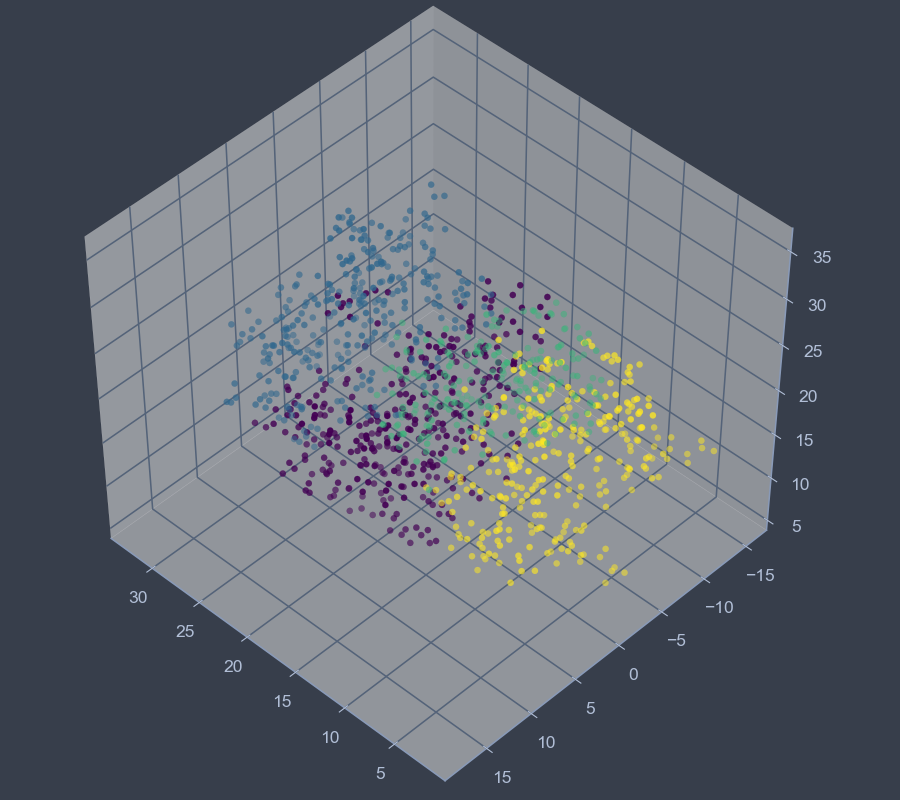

<IPython.core.display.Javascript object>


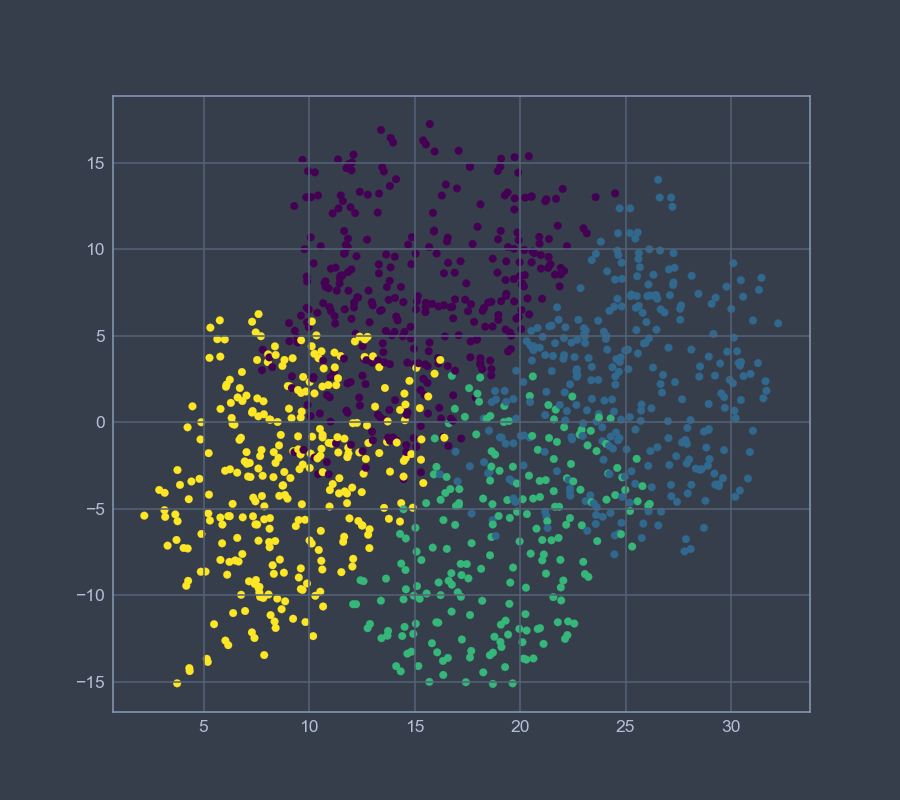

<IPython.core.display.Javascript object>


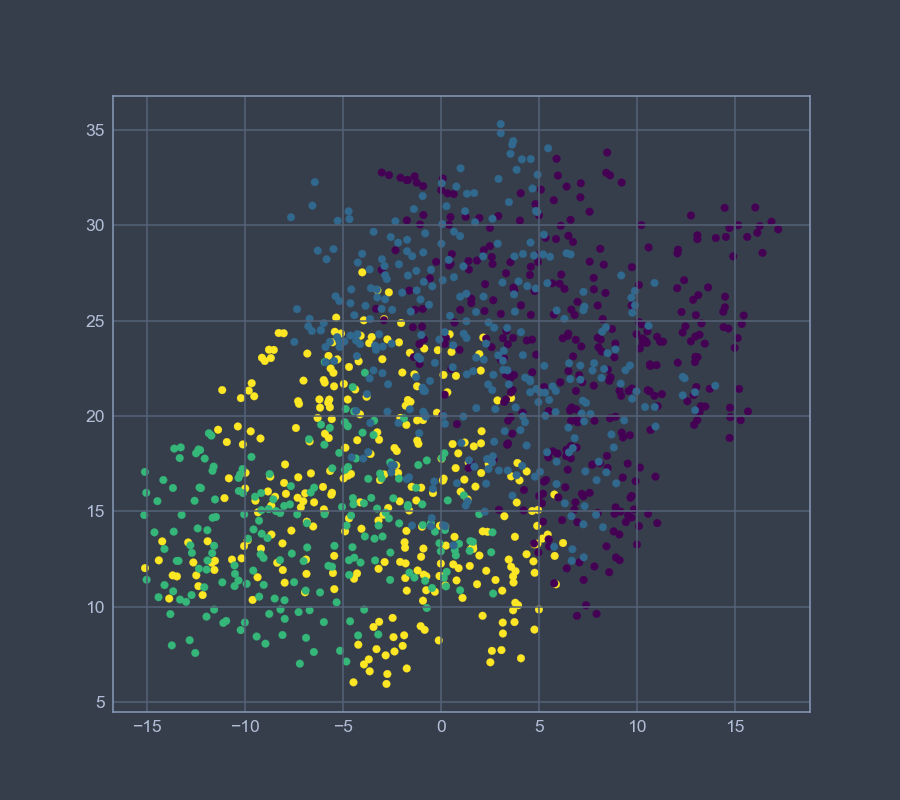

<IPython.core.display.Javascript object>


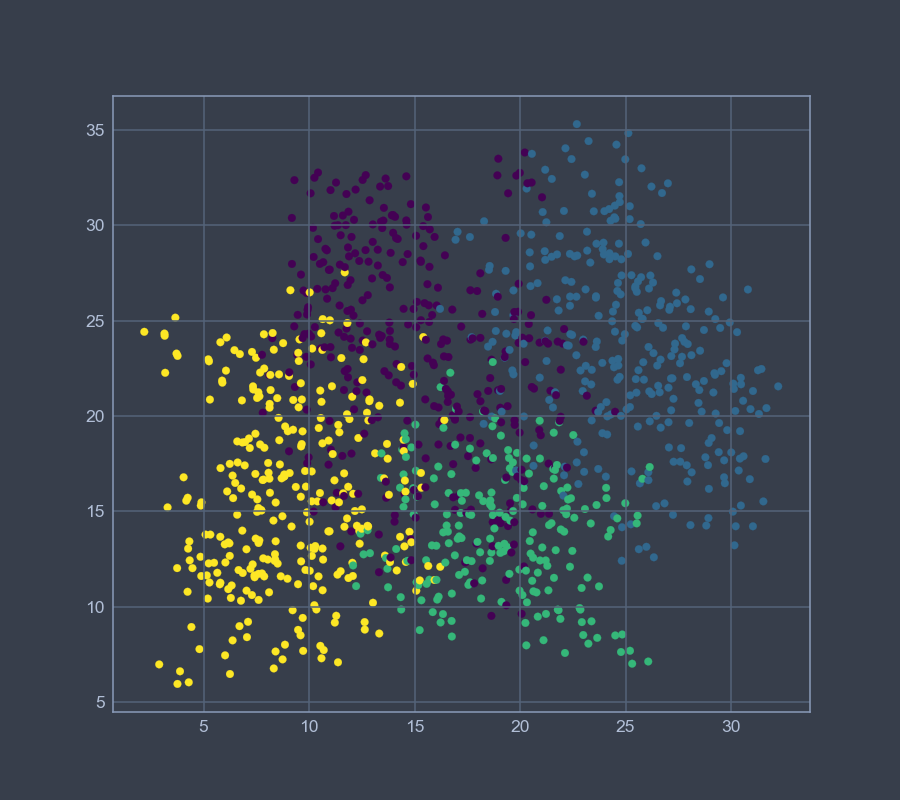

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt
from time import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

dt = np.array([[coor[1], coor[2], coor[3]] for coor in atoms])
print("dt: ", dt[0])
ks = KMeans(n_clusters=4, init='random')
ks.fit(dt)
labels = ks.predict(dt)
print("dt: ", dt[0])
print("lbls: ", labels)
xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]

fig = plt.figure(figsize=(9, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(xs, ys, zs, c=labels)
# fig.show()

plt.figure(figsize=(9, 8))
plt.scatter(xs, ys, c=labels)
plt.show()

plt.figure(figsize=(9, 8))
plt.scatter(ys, zs, c=labels)
plt.show()

plt.figure(figsize=(9, 8))
plt.scatter(xs, zs, c=labels)
plt.show()

In [4]:
%matplotlib notebook

from sklearn.cluster import DBSCAN
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from matplotlib import colors
import matplotlib

from energy import *

colorsMap='jet'
cm = plt.get_cmap(colorsMap)
scalarMap = cmx.ScalarMappable(cmap=cm)

dt = np.array([[coor[1], coor[2], coor[3]] for coor in atoms])
# Compute DBSCAN eps=1.6, min_samples=5 eucl
# manh eps=3, min_samples=5


dist = []
r = 10
for i in range(0, len(atoms)):
	tmp = nghbnb(atoms, i, r)[0]
	dist.append(len(tmp))

labels = dist
# db = DBSCAN(eps=1.3829, min_samples=3, metric='euclidean', algorithm='ball_tree').fit(dt)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]
#print(labels)

scalarMap = cmx.ScalarMappable(norm=colors.Normalize(0, n_clusters_), cmap=cm)

plt.figure(figsize=(10, 3))
plt.scatter(xs, zs, c=scalarMap.to_rgba(labels))
scalarMap.set_array(scalarMap.to_rgba(labels))
plt.colorbar(scalarMap)
plt.show()

#lbl = [0] * len(labels)
#lbl[684] = 1
fig = plt.figure(figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(xs, ys, zs, c=scalarMap.to_rgba(labels))

# # Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(10, 9))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dt[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dt[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
#ax.scatter(xy[:, 0], xy[:, 1], xy[:, 0], c = labels)
plt.show()

Estimated number of clusters: 337


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: name 'core_samples_mask' is not defined

<IPython.core.display.Javascript object>


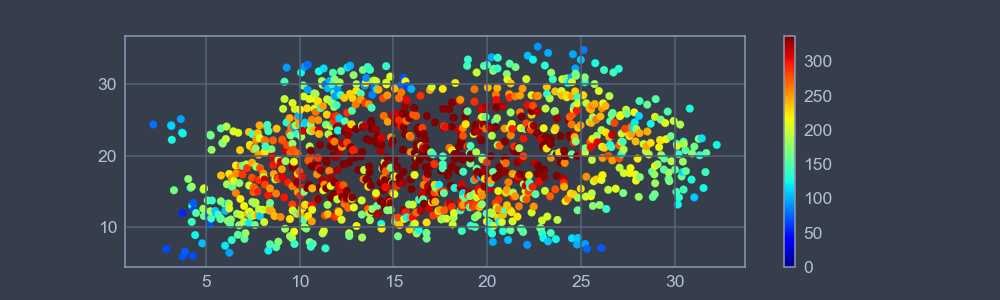

<IPython.core.display.Javascript object>


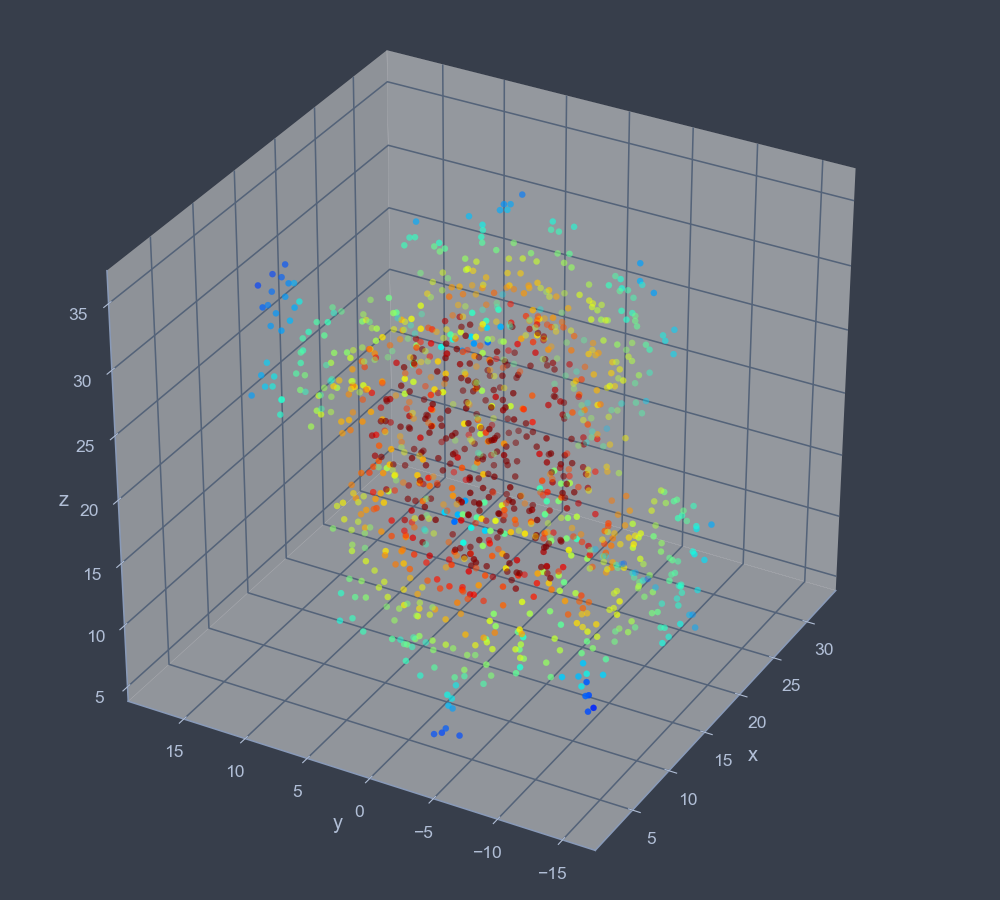

In [5]:
from matplotlib import colors
scalarMap = cmx.ScalarMappable(norm=colors.Normalize(0, n_clusters_), cmap=cm)

plt.figure(figsize=(10, 3))
plt.scatter(xs, zs, c=scalarMap.to_rgba(labels))
scalarMap.set_array(scalarMap.to_rgba(labels))
plt.colorbar(scalarMap)
plt.show()

#lbl = [0] * len(labels)
#lbl[684] = 1
fig = plt.figure(figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(xs, ys, zs, c=scalarMap.to_rgba(labels))


In [19]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

# print("digits: ", digits)
# print(" data: ", data)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.41s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.22s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.05s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


In [11]:
logger.handlers

[<FileHandler D:\python_proj\diploma\scripts\log2018-05-04_07-20.txt (DEBUG)>,
 <StreamHandler stdout (WARNING)>]

In [13]:
problem = np.where(np.array(labels) < 150)
print(problem)

(array([   0,    1,    2,    3,    4,    6,    7,    8,    9,   10,   11,
         13,   14,   16,   17,   18,   19,   20,   22,   28,   29,   33,
         35,   36,   37,   38,   46,   47,   51,   56,   60,   85,   91,
         96,  118,  131,  133,  135,  136,  140,  167,  172,  173,  194,
        196,  202,  209,  215,  218,  228,  230,  235,  236,  247,  256,
        271,  276,  284,  288,  289,  298,  301,  311,  312,  313,  325,
        327,  332,  333,  339,  343,  361,  369,  402,  405,  408,  412,
        421,  426,  431,  434,  439,  448,  470,  499,  509,  517,  526,
        528,  537,  542,  555,  556,  597,  609,  616,  617,  645,  655,
        662,  672,  673,  679,  682,  687,  691,  693,  699,  706,  722,
        732,  747,  751,  753,  757,  761,  763,  765,  770,  780,  782,
        787,  793,  807,  845,  864,  866,  871,  881,  890,  898,  901,
        905,  912,  914,  915,  919,  923,  931,  939,  953,  961,  962,
        965,  969,  977,  982,  984,  989,  992,  

In [17]:
from output import *
from energy import *

r = 20 
num = 962
prev = atoms[num][1]
E_E = grad_energy.E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh)
print("First one: ", E_E)
nghb_d = nghb_dihedrals(dihedrals, num)
nghb_a = nghb_angles(angles, num)
nghb_b = nghb_bonds(bonds, num)
nghb_nb = nghbnb(atoms, num, r)[0]
nghbc = nghbnb(atoms, num, r)[1] 
E_delt = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
								   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb)
print("First E_delt: ", E_delt)

old_E_delt = E_delt
old_E = E_E
print("Changing x for 0.2, prev:", prev)
atoms[num][1] = prev + 0.02
print("new value: ", atoms[num][1])

E_E = grad_energy.E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh)
print("Second one: ", E_E)

nghb_d = nghb_dihedrals(dihedrals, num)
nghb_a = nghb_angles(angles, num)
nghb_b = nghb_bonds(bonds, num)
nghb_nb = nghbnb(atoms, num, r)[0]
nghbc = nghbnb(atoms, num, r)[1] 
E_delt = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
								   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb)
print("Second E_delt: ", E_delt)
print("Delta:", old_E.E - E_E.E, " dih:", old_E.dih - E_E.dih, " ang: ", old_E.ang - E_E.ang," bond: ", old_E.bond - E_E.bond," elst: ", old_E.elst - E_E.elst," vdw: ", old_E.vdw - E_E.vdw)
print("Delta:", old_E_delt.E - E_delt.E, " dih:", old_E_delt.dih - E_delt.dih, " ang: ", old_E_delt.ang - E_delt.ang," bond: ", old_E_delt.bond - E_delt.bond," elst: ", old_E_delt.elst - E_delt.elst," vdw: ", old_E_delt.vdw - E_delt.vdw)

First one:  eng(E=-12008.11231050883, dih=682.7178654983154, ang=452.2510076876046, bond=136.61452891242408, elst=-12026.503428177584, vdw=-1253.1922844295896)
First E_delt:  eng(E=-42.66332207486071, dih=-0.42350706419644457, ang=1.6136347709350092, bond=0.10147693510178918, elst=-43.22851746805507, vdw=-0.7264092486459921)
Changing x for 0.2, prev: 24.493
new value:  24.512999999999998
Second one:  eng(E=-12008.38846708765, dih=682.7591715638052, ang=452.2011407103546, bond=136.70832182720602, elst=-12026.807696151709, vdw=-1253.2494050373089)
Second E_delt:  eng(E=-42.88225728923307, dih=-0.3822009987067117, ang=1.563767793685039, bond=0.19526984988375293, elst=-43.532785442177826, vdw=-0.726308491917319)
Delta: 0.2761565788205189  dih: -0.04130606548983451  ang:  0.04986697725001932  bond:  -0.09379291478194318  elst:  0.30426797412474116  vdw:  0.05712060771929828
Delta: 0.2189352143723582  dih: -0.04130606548973287  ang:  0.049866977249970246  bond:  -0.09379291478196375  elst:  

In [7]:
from output import *
from energy import *
from itertools import cycle
from colorama import Fore

N = 200 # 14000  # 10000 # число итераций
l = len(atoms)  # число атомов в изучаемом белке
h = [0.02, 0.02, 0.02]  # размеры шагов по ортам в ангстремах
# L = 3  # сколько шагов делаем вдоль каждого орта с учетом знака
S = 0
r = 20  # размер окрестности атома, по которой честно суммируем
M = 20  # параметр, отвечающий за частоту вывода и сохранения информации
mas = []
tt = []
tta = []

eng_raw = []
tt_checkpoint = []
eng_dih = []
eng_ang = []
eng_bonds = []
eng_elst = []
eng_vdw = []

time_start = millis()
how_much = 0
edge_color = n_clusters_ + 1
lbl = np.zeros(len(labels))

problem = np.where(np.array(labels) > 300)[0]
#print(problem)

for k in range(0, N):
	num = pyrandom.choice(problem)
	#num = pyrandom.randrange(0, l)
	# это просто печать результатов в файлы и отображения хода работы метода
	if k/M == int(k/M):
		# prp_atm(atoms, k)
		# os.system('./to-pdb atoms_out' + str(k) + '.csv output' + str(k) + '.pdb')
		time_now = millis()
		tm = (time_now - time_start)/60000
		logger.info(Fore.GREEN + "################################" + Fore.RESET)
		logger.info(Fore.GREEN + "№ Iteration {}; Energy {}; Time (minutes) {}".format(k, S, tm) + Fore.RESET)
		logger.info(Fore.GREEN + "################################\n" + Fore.RESET)
		E_E = grad_energy.E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh)
		logger.debug("Full molecula energy raw: {0} \n\tDihedrals: {1}\n\tAngles: {2}\n\tBonds: {3}\n\tElst: {4}\n\tVdw: {4}"
					 .format(E_E.E, E_E.dih, E_E.ang, E_E.bond, E_E.elst, E_E.vdw))
		tt_checkpoint.append(time_now)
		eng_raw.append(E_E.E)
		eng_dih.append(E_E.dih)
		eng_ang.append(E_E.ang)
		eng_bonds.append(E_E.bond)
		eng_elst.append(E_E.elst)
		eng_vdw.append(E_E.vdw)
	
	nghb_d = nghb_dihedrals(dihedrals, num)
	nghb_a = nghb_angles(angles, num)
	nghb_b = nghb_bonds(bonds, num)
	nghb_nb = nghbnb(atoms, num, r)[0]
	nghbc = nghbnb(atoms, num, r)[1] 
	E_old = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
			  three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb)
	
	actual = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	parabola_arg = np.array([0.0, 0.0, 0.0], dtype=np.float64)
	
	coors = [1, 2, 3]
	
	possibilities = [[0, 0, 0], [0, 0, 0]]
	cands = [[], [], []]
	
	candidates = [[0, 0, 0], [0, 0, 0]]
	
	logger.info("num: %d"% num)
	for ort in range(3):
		which_coor = coors[ort]
		prev = atoms[num][which_coor]
		
		#modif = 1
		for indent in [-1, 0, 1]:
# 			if indent < 0:
# 				modif = 0.75
# 			if indent > 0:
# 				modif = 1.3
			parabola_arg[1 + indent] = np.float64(prev + indent * h[ort] )#* modif)
			atoms[num][which_coor] = prev + indent * h[ort] #* modif
			
			nghb_nb = nghbnb(atoms, num, r)[0]
			nghbc = nghbnb(atoms, num, r)[1] 
			actual[1 + indent] = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
									   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb)
			#print("orig atom: ", prev, " observing point: ", atoms[num][which_coor], \
			#	  "\n\tenergy: ", actual[1 + indent], " DE_elst: ", DE_elst, " C: ", c)
		atoms[num][which_coor] = prev
		cands[ort] = [actual[0], actual[1], actual[2]]
		
		# save mins of en-gy
		ind = np.argmin(cands[ort])
		candidates[0][ort] = cands[ort][ind]
		candidates[1][ort] = parabola_arg[ind]
		
		ret = suppose_parabola(parabola_arg, actual, logger)
		
		prev = atoms[num][which_coor]
		if ((ret.grad_0 >= 0) and (ret.grad_1 >= 0) and (ret.grad_2 >= 0)) \
				 or ((ret.grad_0 < 0) and (ret.grad_1 < 0) and (ret.grad_2 < 0)):
			logger.info("We will do nothing.")
			logger.info(Fore.RED + "Recount!!!. Gradients: {0} {1} {2}".format(ret.grad_0, ret.grad_1, ret.grad_2) + Fore.RESET)
			sign = 0
			if ret.grad_0 < 0:
				sign = -1
				change_point = np.argmin([ret.grad_0, ret.grad_1, ret.grad_2])
			else:
				sign = +1
				change_point = np.argmax([ret.grad_0, ret.grad_1, ret.grad_2])
			logger.warning(Fore.MAGENTA + "We will not use parabola." + Fore.RESET)
			possibilities[0][ort] = actual[2 - change_point]
			possibilities[1][ort] = parabola_arg[2 - change_point]
# 			parabola_arg[change_point] = ret.arg + 0.02 * sign 
# 			atoms[num][which_coor] = parabola_arg[change_point]
			
# 			nghb_nb = nghbnb(atoms, num, r)[0]
# 			nghbc = nghbnb(atoms, num, r)[1] 
# 			actual[change_point] = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
# 									   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb).E
# 			ret = suppose_parabola(parabola_arg, actual, logger)
			
# 			grads = [ret.grad_0, ret.grad_1, ret.grad_2]
# 			if grads[change_point] * sign > 0:
# 				logger.warning(Fore.MAGENTA + "We will not use parabola." + Fore.RESET)
# 				possibilities[0][ort] = actual[2 - change_point]
# 				possibilities[1][ort] = parabola_arg[2 - change_point]
# 			else:
# 				possibilities[0][ort] = ret.E
# 				possibilities[1][ort] = ret.arg
		else:
			possibilities[0][ort] = ret.E
			possibilities[1][ort] = ret.arg
		atoms[num][which_coor] = prev
		
	where = int(np.argmin(possibilities[0]))
	check = atoms[num][coors[where]]
	atoms[num][coors[where]] = possibilities[1][where]
	nghb_nb = nghbnb(atoms, num, r)[0]
	nghbc = nghbnb(atoms, num, r)[1] 
	ex = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh,
							   three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb).E
	delta_sup = np.double(possibilities[0][where]) - np.double(ex)
	logger.error("Maybe we should use orig energy:: supposed: %f just minimum arg used: %f diff: %f"% (possibilities[0][where], ex, delta_sup))
	atoms[num][coors[where]] = check
	E_new = ex
	parabola_min_arg = possibilities[1][where]
	
	ind = int(np.argmin(candidates[0]))
	E_cand = candidates[0][ind]
	
	
	orta = '\'\''
	if where == 0:
		orta = 'x'
	elif where == 1:
		orta = 'y'
	elif where == 2:
		orta = 'z'
	logger.info("Energies: [E_new = %f, E_cand = %f, E_old = %f]"% (E_new, E_cand, E_old))
	energies = np.array([E_new, E_cand, E_old])
	minimum_eng = np.argmin(energies)
	E_new = energies[minimum_eng]
	if minimum_eng == 2:
		logger.debug(Fore.MAGENTA + "We will do nothing." + Fore.RESET)
		lbl[num] = 0.5
		#h[where] = 0.02
		parabola_min_arg = atoms[num][coors[where]]
	elif minimum_eng == 1:
		parabola_min_arg = candidates[1][ind]
		lbl[num] = 1
		#h[where] = 0.02
		# print("Actual minimum: ", E_new)
		# atoms[num][coors[ind]] = parabola_min_arg
	else:
		logger.info(Fore.CYAN + "Parabola works." + Fore.RESET)
		logger.info("Ort: %s and num of atom: %d"% (orta, num))
		logger.info("Prev value: %f new: %f"% (atoms[num][coors[where]], parabola_min_arg))
		logger.debug("Possibilities: \n\t eng: {0} \n\t cands: \n\t\t x: {1}\n\t\t y: {2}\n\t\t z: {3}"
					 .format(str(possibilities[0]), str(cands[0]), str(cands[1]), str(cands[2])))
		lbl[num] = 2
		#h[where] = atoms[num][coors[where]] - parabola_min_arg
	logger.info("Ort: %s and num of atom: %d"% (orta, num))
	logger.info("E_new: %f\tE_old: %f"%( E_new, E_old) )#, "\tE_raw: ", raw_E, "\n")
	logger.info("Prev value: %f new: %f"% (atoms[num][coors[where]], parabola_min_arg))
	atoms[num][coors[where]] = parabola_min_arg
	
	if (E_old - E_new) > 0.2:
		S = S + E_old - E_new
	elif (E_old - E_new) < 0:
		logger.error(Fore.RED + "Prev value: %f new: %f"% (atoms[num][coors[where]], parabola_min_arg) + Fore.RESET)
		logger.error(Fore.RED + "Problem: " + num + Fore.RESET)
	mas.append(S)

	time_now = millis()
	ttm = (time_now - time_start) / 60000
	tt.append(ttm)
	tta.append(time_now)
	
	logger.info("Resulting S: %f\n"% S)

E_E = grad_energy.E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh)
logger.debug("Full molecula energy raw: {0} \n\tDihedrals: {1}\n\tAngles: {2}\n\tBonds: {3}\n\tElst: {4}\n\tVdw: {4}"
			 .format(E_E.E, E_E.dih, E_E.ang, E_E.bond, E_E.elst, E_E.vdw))
tt_checkpoint.append(time_now)
eng_raw.append(E_E.E)
eng_dih.append(E_E.dih)
eng_ang.append(E_E.ang)
eng_bonds.append(E_E.bond)
eng_elst.append(E_E.elst)
eng_vdw.append(E_E.vdw)

23:28:22 [WARNING] We will not use parabola.
23:28:22 [WARNING] We will not use parabola.
23:28:22 [ERROR  ] Maybe we should use orig energy:: supposed: -135.508273 just minimum arg used: -135.508273 diff: 0.000000
23:28:23 [ERROR  ] Maybe we should use orig energy:: supposed: 7.717714 just minimum arg used: 7.717359 diff: 0.000355
23:28:24 [ERROR  ] Maybe we should use orig energy:: supposed: 30.530409 just minimum arg used: 30.529398 diff: 0.001012
23:28:25 [ERROR  ] Maybe we should use orig energy:: supposed: -3.076157 just minimum arg used: -3.076254 diff: 0.000097
23:28:26 [WARNING] We will not use parabola.
23:28:26 [ERROR  ] Maybe we should use orig energy:: supposed: -14.441453 just minimum arg used: -14.441453 diff: 0.000000
23:28:27 [ERROR  ] Maybe we should use orig energy:: supposed: 37.332898 just minimum arg used: 37.332526 diff: 0.000372
23:28:27 [WARNING] We will not use parabola.
23:28:28 [ERROR  ] Maybe we should use orig energy:: supposed: -63.451463 just minimum arg

23:31:02 [ERROR  ] Maybe we should use orig energy:: supposed: -3.675692 just minimum arg used: -3.675179 diff: -0.000513
23:31:03 [ERROR  ] Maybe we should use orig energy:: supposed: -6.523721 just minimum arg used: -6.524315 diff: 0.000594
23:31:04 [ERROR  ] Maybe we should use orig energy:: supposed: -5.924523 just minimum arg used: -5.924728 diff: 0.000205
23:31:05 [ERROR  ] Maybe we should use orig energy:: supposed: -19.335565 just minimum arg used: -19.335432 diff: -0.000133
23:31:06 [ERROR  ] Maybe we should use orig energy:: supposed: 12.809861 just minimum arg used: 12.809911 diff: -0.000050
23:31:07 [ERROR  ] Maybe we should use orig energy:: supposed: 4.208872 just minimum arg used: 4.207998 diff: 0.000874
23:31:08 [WARNING] We will not use parabola.
23:31:09 [ERROR  ] Maybe we should use orig energy:: supposed: -191.588901 just minimum arg used: -191.588901 diff: 0.000000
23:31:10 [ERROR  ] Maybe we should use orig energy:: supposed: -1.680535 just minimum arg used: -1.68

23:33:52 [ERROR  ] Maybe we should use orig energy:: supposed: 1.888746 just minimum arg used: 1.889127 diff: -0.000381
23:33:53 [ERROR  ] Maybe we should use orig energy:: supposed: -91.269355 just minimum arg used: -91.270284 diff: 0.000930
23:33:54 [ERROR  ] Maybe we should use orig energy:: supposed: -6.810119 just minimum arg used: -6.809828 diff: -0.000291
23:33:55 [ERROR  ] Maybe we should use orig energy:: supposed: -6.392888 just minimum arg used: -6.393735 diff: 0.000847
23:33:55 [ERROR  ] Maybe we should use orig energy:: supposed: 44.711832 just minimum arg used: 44.710959 diff: 0.000873
23:33:56 [ERROR  ] Maybe we should use orig energy:: supposed: -3.165135 just minimum arg used: -3.165646 diff: 0.000511
23:33:57 [ERROR  ] Maybe we should use orig energy:: supposed: 54.434640 just minimum arg used: 54.434272 diff: 0.000368
23:33:58 [ERROR  ] Maybe we should use orig energy:: supposed: 35.500451 just minimum arg used: 35.500296 diff: 0.000155
23:33:59 [ERROR  ] Maybe we sh

23:36:44 [ERROR  ] Maybe we should use orig energy:: supposed: -26.008559 just minimum arg used: -26.008093 diff: -0.000467
23:36:44 [WARNING] We will not use parabola.
23:36:45 [WARNING] We will not use parabola.
23:36:45 [ERROR  ] Maybe we should use orig energy:: supposed: -42.766181 just minimum arg used: -42.766181 diff: 0.000000
23:36:46 [ERROR  ] Maybe we should use orig energy:: supposed: -13.388829 just minimum arg used: -13.389431 diff: 0.000602
23:36:47 [ERROR  ] Maybe we should use orig energy:: supposed: -12.717120 just minimum arg used: -12.717461 diff: 0.000341
23:36:49 [ERROR  ] Maybe we should use orig energy:: supposed: 12.716091 just minimum arg used: 12.716144 diff: -0.000053
23:36:50 [ERROR  ] Maybe we should use orig energy:: supposed: -60.309004 just minimum arg used: -60.308698 diff: -0.000306
23:36:51 [ERROR  ] Maybe we should use orig energy:: supposed: -75.055344 just minimum arg used: -75.055060 diff: -0.000284
23:36:52 [ERROR  ] Maybe we should use orig ene

In [71]:
import csv

csvfile = "tta_grad_01.05.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    #for val in mas:
    writer.writerow(tta_grad) 

In [72]:
import json
with open('eng_raw_grad_01.05.json', 'w') as outfile:
    json.dump(eng_raw_grad, outfile)
with open('eng_ang_grad_01.05.json', 'w') as outfile:
    json.dump(eng_ang_grad, outfile)
with open('eng_bonds_grad_01.05.json', 'w') as outfile:
    json.dump(eng_bonds_grad, outfile)
with open('eng_dih_grad_01.05.json', 'w') as outfile:
    json.dump(eng_dih_grad, outfile)
with open('eng_elst_grad_01.05.json', 'w') as outfile:
    json.dump(eng_elst_grad, outfile)
with open('eng_vdw_grad_01.05.json', 'w') as outfile:
    json.dump(eng_vdw_grad, outfile)
with open('atom_grad_01.05.json', 'w') as outfile:
    json.dump(atoms, outfile)

Color:  48
[[1.000e+00 1.000e+00]
 [2.000e+00 1.154e+03]]


<IPython.core.display.Javascript object>


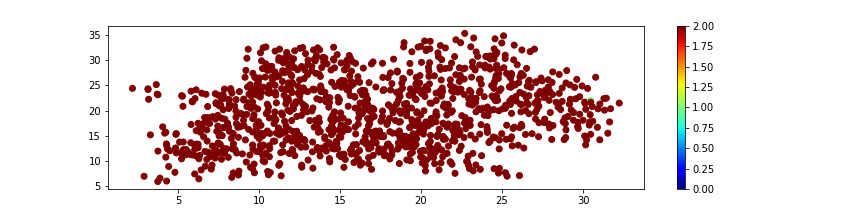

<IPython.core.display.Javascript object>


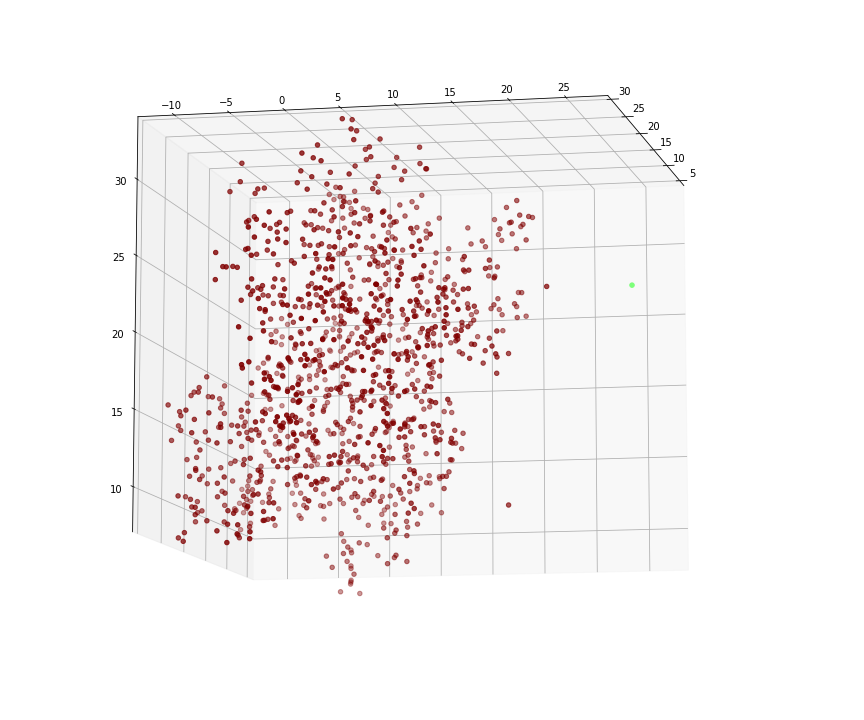

<IPython.core.display.Javascript object>


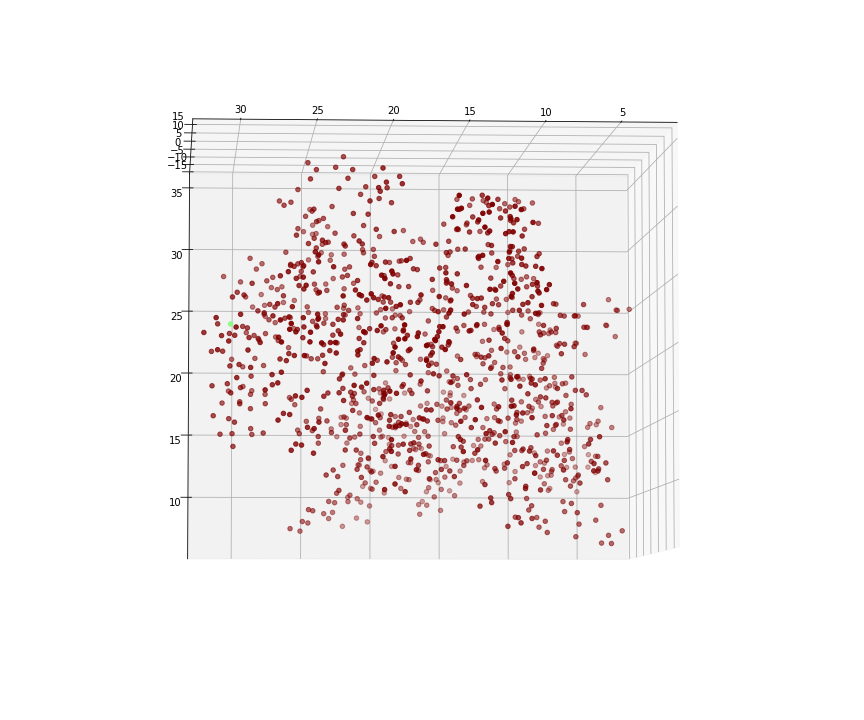

In [15]:
%matplotlib notebook
from matplotlib import colors
from matplotlib import colorbar
print("Color: ", edge_color)

xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]

#lbl = [0] * len(labels)
#lbl[684] = 1
unique, counts = np.unique(lbl, return_counts=True)
print(np.asarray((unique, counts)).T)

colorsMap='jet'
cm = plt.get_cmap(colorsMap)
scalarMap = cmx.ScalarMappable(norm=colors.Normalize(0, 2), cmap=cm)

plt.figure(figsize=(10, 3))
plt.scatter(xs, zs, c=scalarMap.to_rgba(lbl))
scalarMap.set_array(scalarMap.to_rgba(lbl))
plt.colorbar(scalarMap)
plt.show()

fig = plt.figure(figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(xs, ys, zs, c=scalarMap.to_rgba(lbl))

atoms = rd('atoms.txt', 1, 9)
dt = np.array([[coor[1], coor[2], coor[3]] for coor in atoms])
xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]
colorsMap='jet'
cm = plt.get_cmap(colorsMap)
scalarMap = cmx.ScalarMappable(norm=colors.Normalize(0, 2), cmap=cm)

fig = plt.figure(figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(xs, ys, zs, c=scalarMap.to_rgba(lbl))

<IPython.core.display.Javascript object>


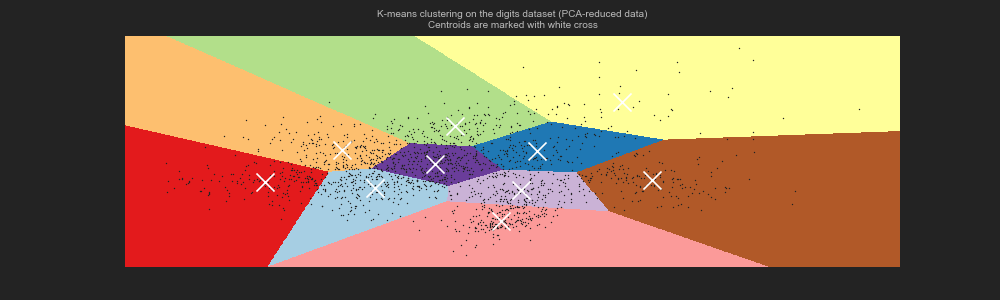

<IPython.core.display.Javascript object>


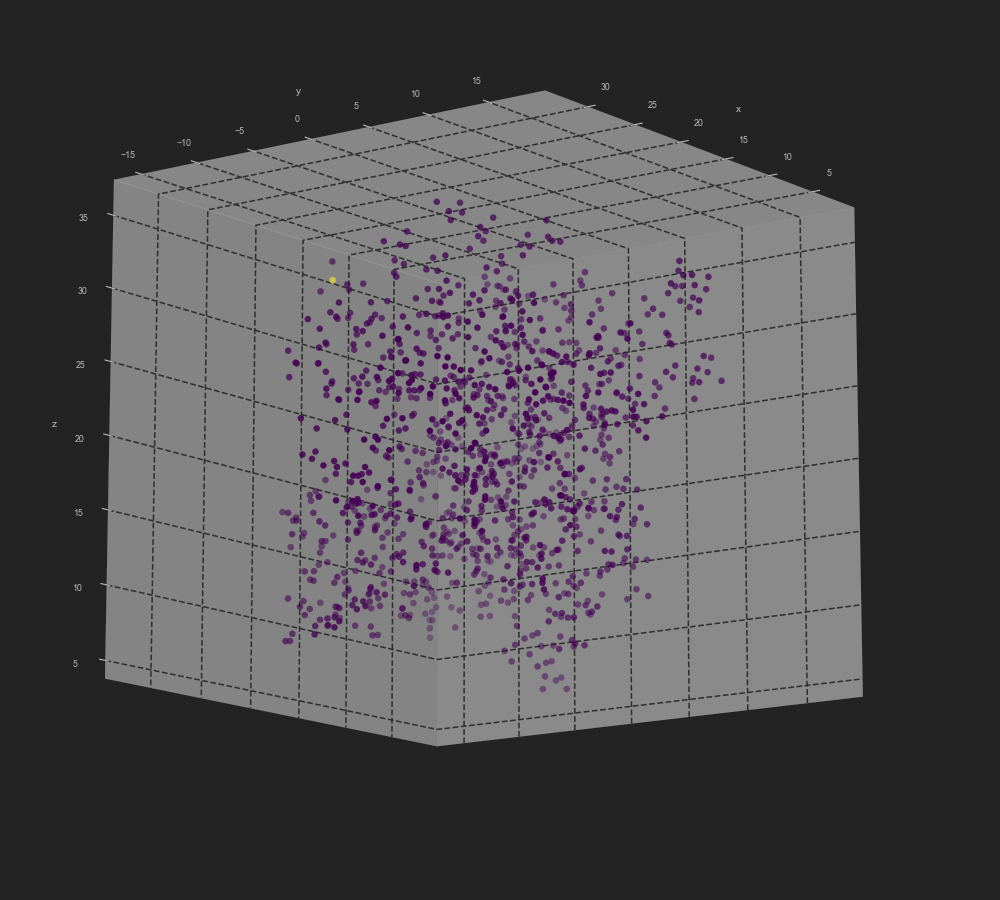

In [18]:
%matplotlib notebook
from matplotlib import colors
from matplotlib import colorbar

orig_labels = np.zeros(len(lbl))

orig_labels[962] = 1

colorsMap='jet'
cm = plt.get_cmap(colorsMap)
scalarMap = cmx.ScalarMappable(norm=colors.Normalize(0, 1), cmap=cm)

plt.figure(figsize=(10, 3))
plt.scatter(xs, zs, c=scalarMap.to_rgba(orig_labels))
scalarMap.set_array(scalarMap.to_rgba(orig_labels))
plt.colorbar(scalarMap)
plt.show()

fig = plt.figure(figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xs, ys, zs, c=orig_labels)

In [8]:
print(time_when[0], time_diff[0])

2018-05-06 00:41:21.210000 2018-05-06 00:41:51.985000


<IPython.core.display.Javascript object>


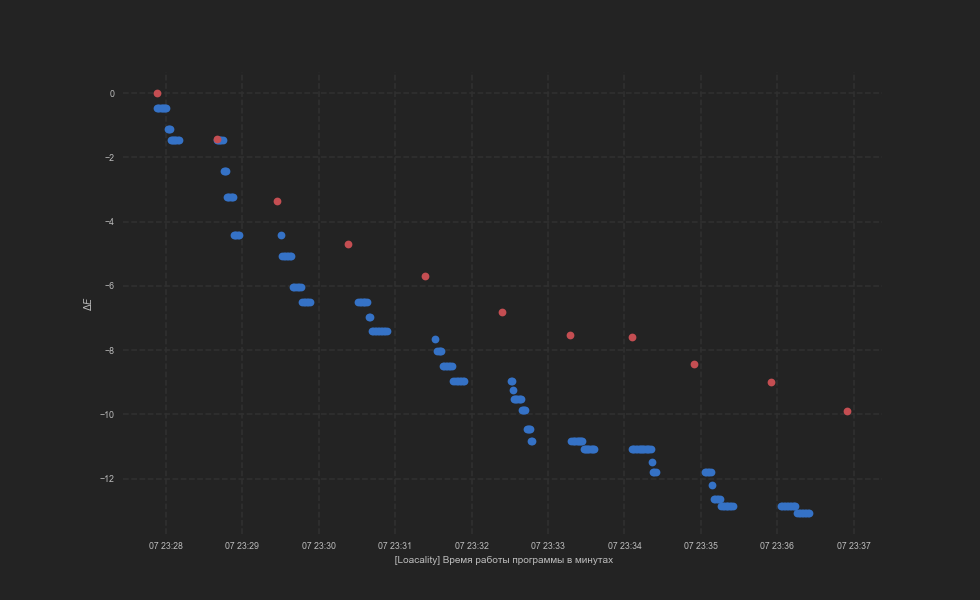

<IPython.core.display.Javascript object>


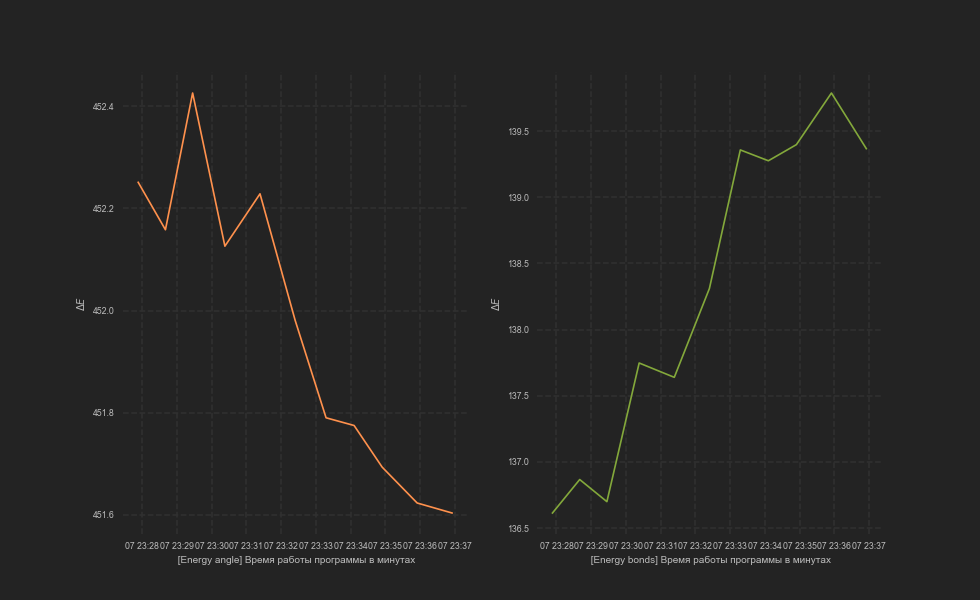

<IPython.core.display.Javascript object>


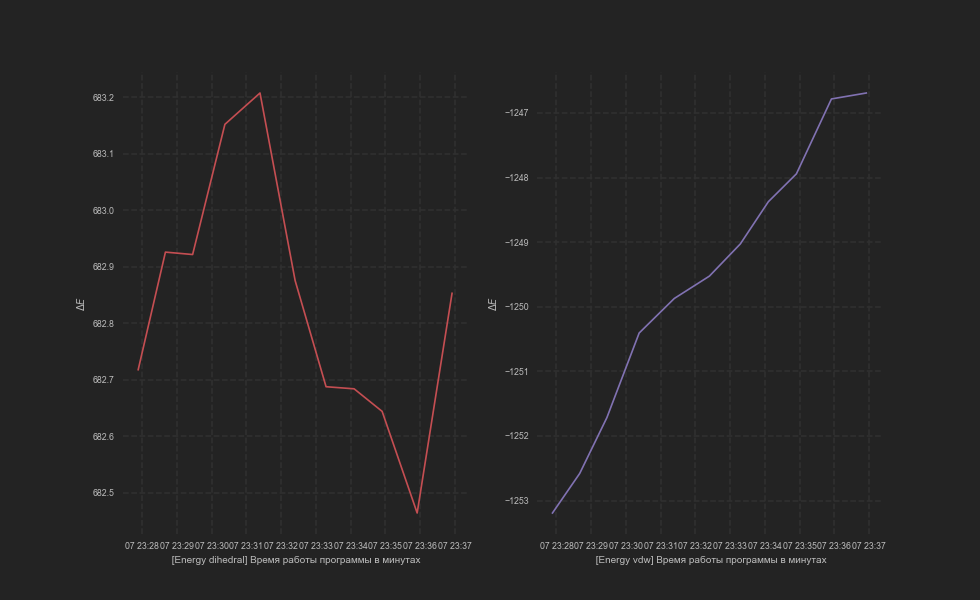

<IPython.core.display.Javascript object>


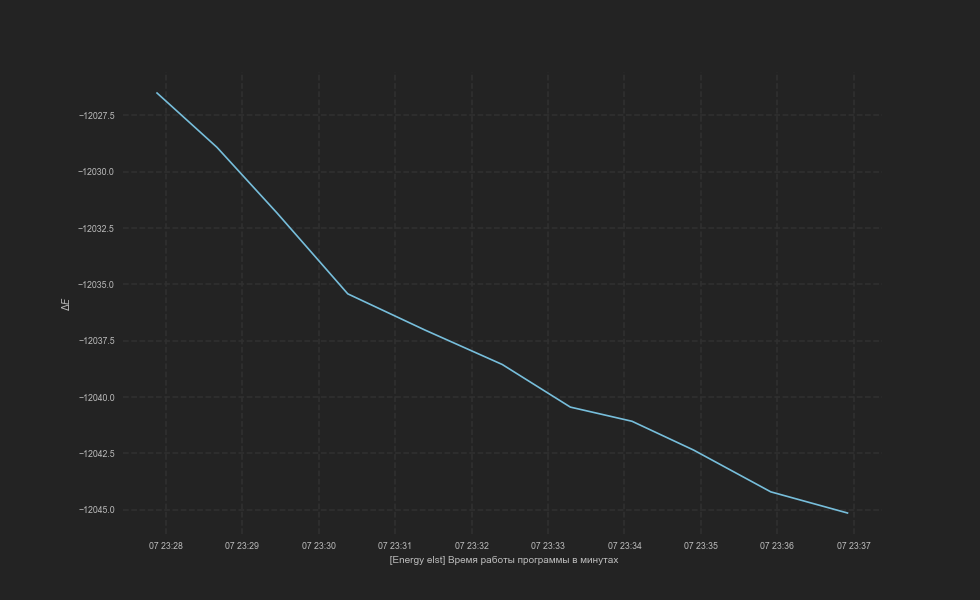

In [8]:
%matplotlib notebook

jtplot.style(theme='monokai', fscale=0.6, spines=False, gridlines='--')

import matplotlib.pyplot as plt
import pandas as pd
import datetime

# mmas_orig = - np.array(mas_orig)

mmas = - np.array(mas)
collibrate = tta[0] - tt_checkpoint[0]
time_when = np.array([datetime.datetime.fromtimestamp(t/1000.0) for t in tt_checkpoint])
time_diff = np.array([datetime.datetime.fromtimestamp((t - collibrate)/1000.0) for t in tta])

plt.figure(figsize=(9.8,6))
#plt.subplot(1, 2, 1)
e0 = eng_raw[0]
dlt = np.array([(l-e0) for l in eng_raw])

plt.plot(time_diff, mmas, 'bo', time_when, dlt, 'ro')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Loacality] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)

# plt.subplot(1, 2, 2)
# plt.plot(time_when, np.array(eng_raw), 'b')#, tt_orig, mmas_orig, 'r')
# plt.xlabel(r" [Raw Energy] Время работы программы в минутах")
# plt.ylabel(r"$\Delta E$")
# plt.grid(True)
plt.show()

#for eng in [eng_ang, eng_bonds, eng_dih, eng_elst, eng_vdw]:
plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_when, np.array(eng_ang), 'y', label='eng_ang')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Energy angle] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_bonds), 'g', label='eng_bonds')
plt.xlabel(r" [Energy bonds] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_when, np.array(eng_dih), 'r', label='eng_dih')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Energy dihedral] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_vdw), 'm', label='eng_vdw')
plt.xlabel(r" [Energy vdw] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.plot(time_when, np.array(eng_elst), 'c', label='eng_elst')
plt.xlabel(r" [Energy elst] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


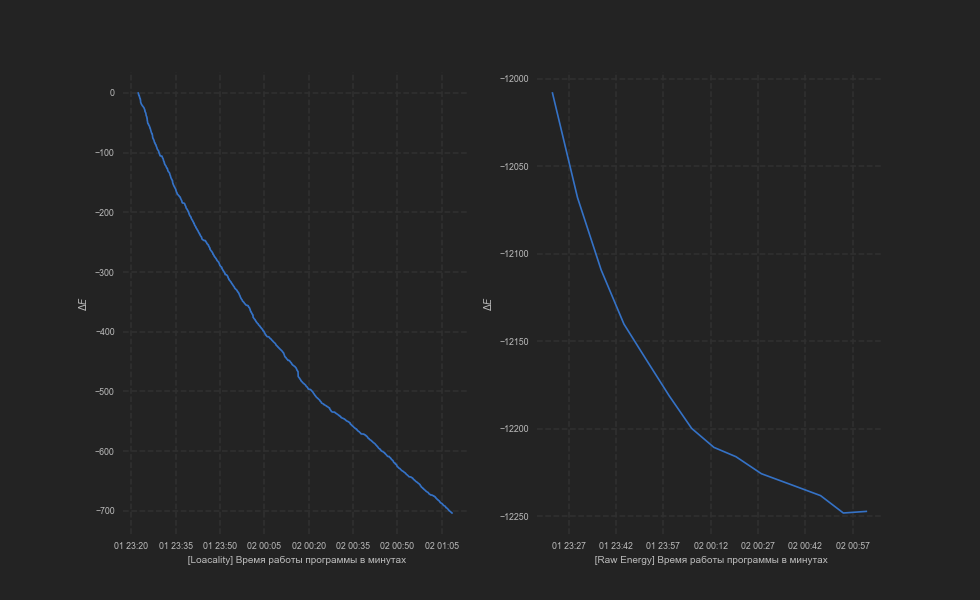

<IPython.core.display.Javascript object>


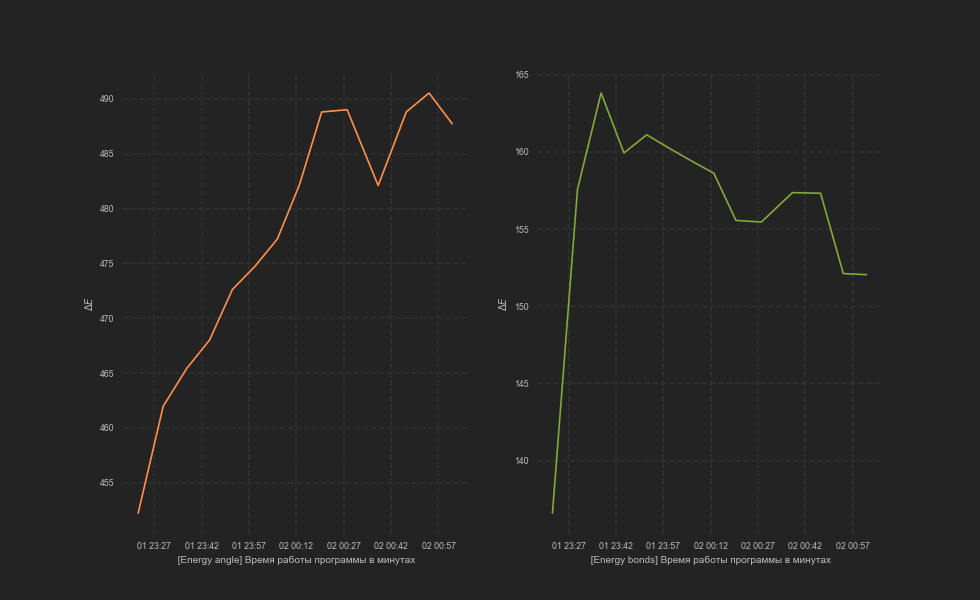

<IPython.core.display.Javascript object>


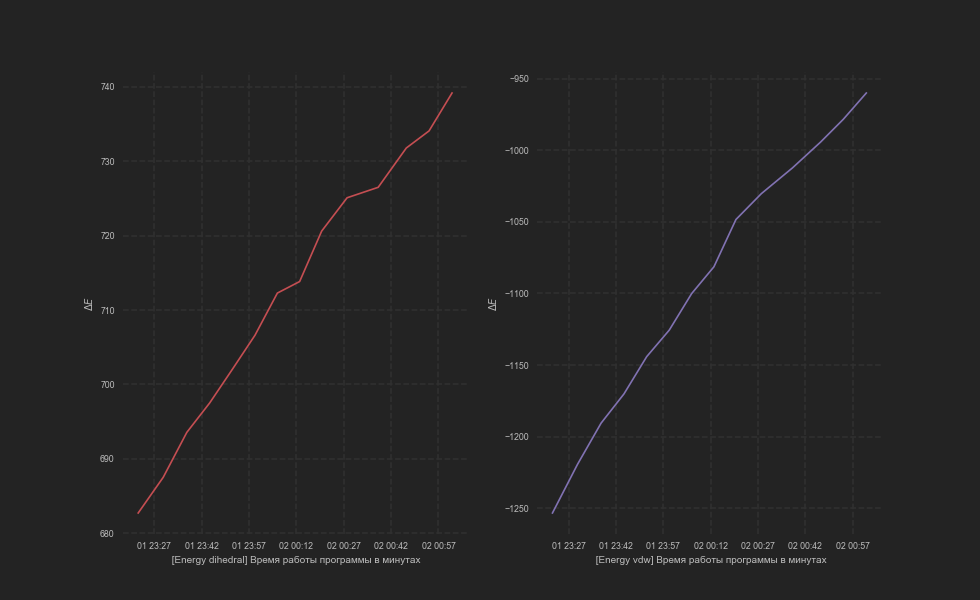

<IPython.core.display.Javascript object>


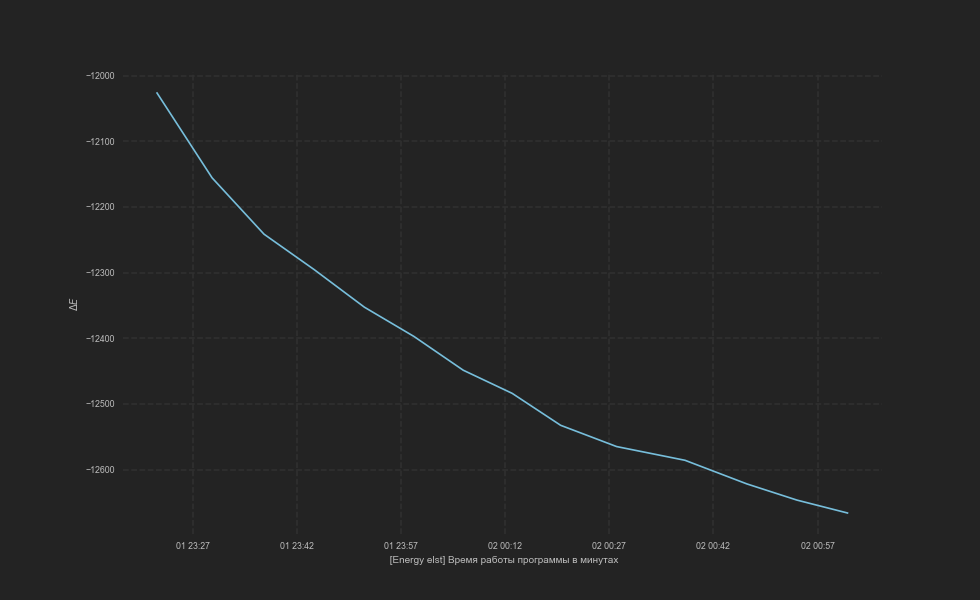

In [75]:
%matplotlib notebook

jtplot.style(theme='monokai', fscale=0.6, spines=False, gridlines='--')
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# mmas_orig = - np.array(mas_orig)

mmas = - np.array(mas)
time_when = np.array([datetime.datetime.fromtimestamp(t/1000.0) for t in tt_checkpoint])
time_diff = np.array([datetime.datetime.fromtimestamp(t/1000.0) for t in tta])

plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_diff, mmas, 'b')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Loacality] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_raw), 'b')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Raw Energy] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.show()

#for eng in [eng_ang, eng_bonds, eng_dih, eng_elst, eng_vdw]:
plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_when, np.array(eng_ang), 'y', label='eng_ang')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Energy angle] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_bonds), 'g', label='eng_bonds')
plt.xlabel(r" [Energy bonds] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_when, np.array(eng_dih), 'r', label='eng_dih')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Energy dihedral] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_vdw), 'm', label='eng_vdw')
plt.xlabel(r" [Energy vdw] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.plot(time_when, np.array(eng_elst), 'c', label='eng_elst')
plt.xlabel(r" [Energy elst] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


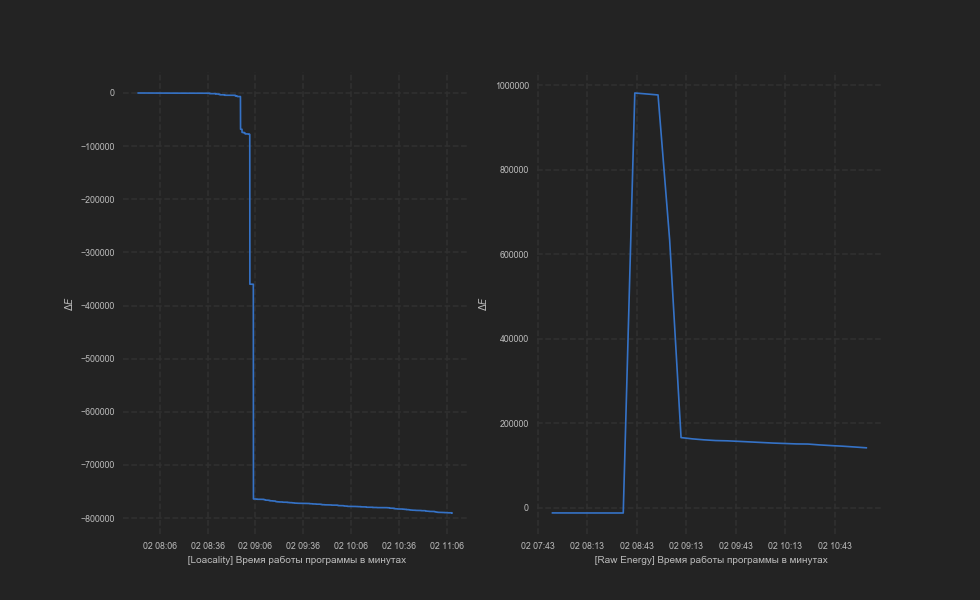

<IPython.core.display.Javascript object>


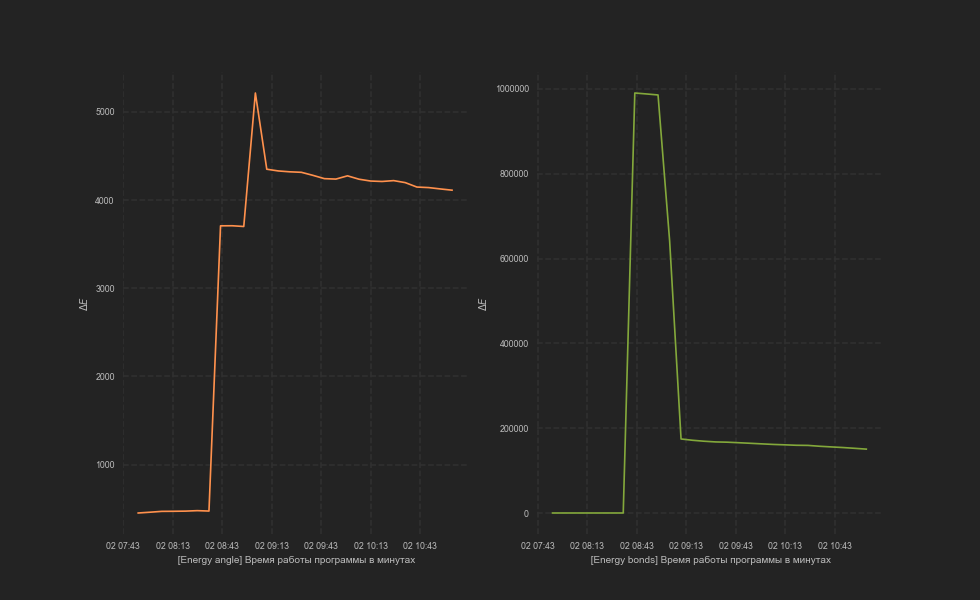

<IPython.core.display.Javascript object>


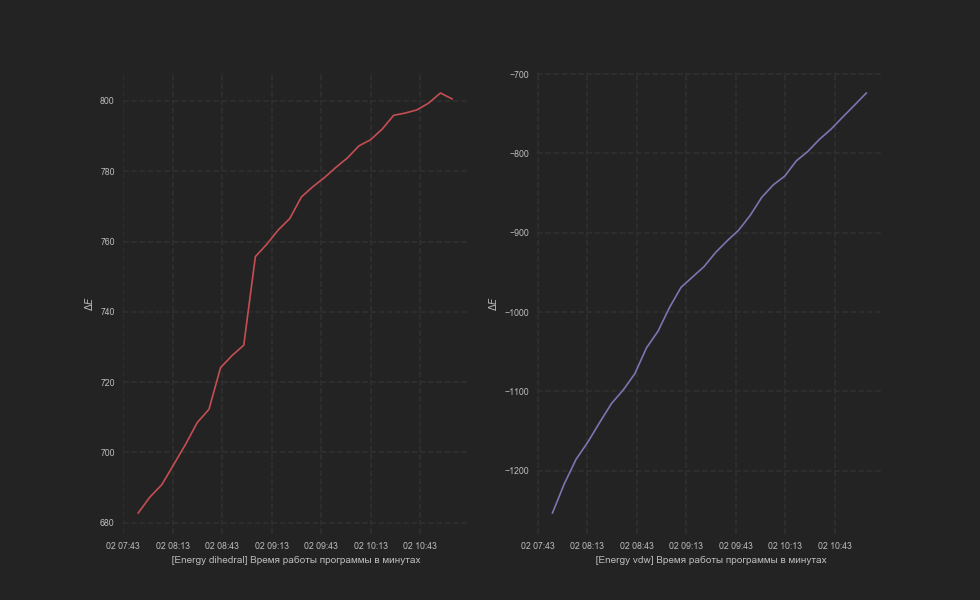

<IPython.core.display.Javascript object>


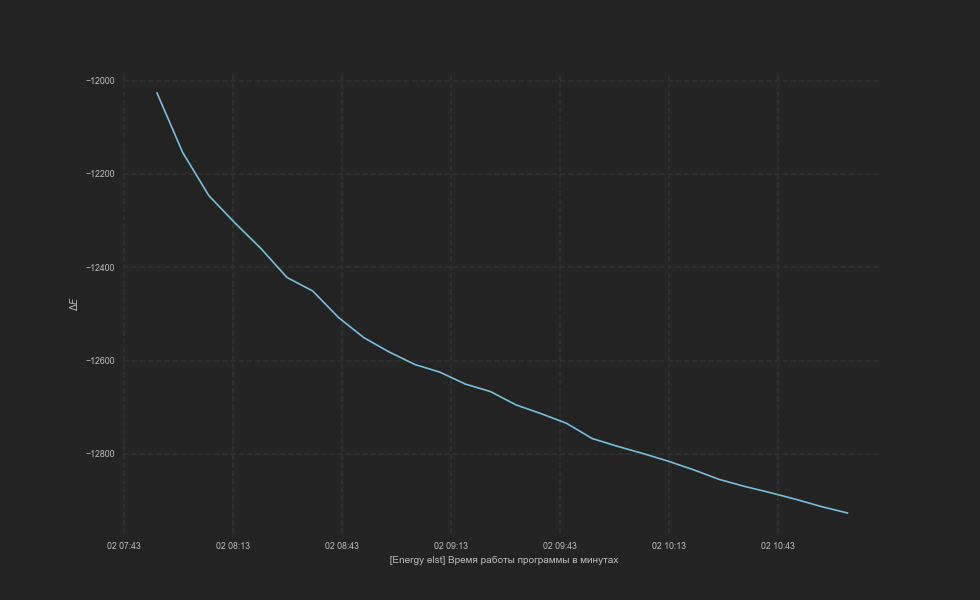

In [80]:
%matplotlib notebook

jtplot.style(theme='monokai', fscale=0.6, spines=False, gridlines='--')
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# mmas_orig = - np.array(mas_orig)

mmas = - np.array(mas)
time_when = np.array([datetime.datetime.fromtimestamp(t/1000.0) for t in tt_checkpoint])
time_diff = np.array([datetime.datetime.fromtimestamp(t/1000.0) for t in tta])

plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_diff, mmas, 'b')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Loacality] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_raw), 'b')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Raw Energy] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.show()

#for eng in [eng_ang, eng_bonds, eng_dih, eng_elst, eng_vdw]:
plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_when, np.array(eng_ang), 'y', label='eng_ang')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Energy angle] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_bonds), 'g', label='eng_bonds')
plt.xlabel(r" [Energy bonds] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_when, np.array(eng_dih), 'r', label='eng_dih')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Energy dihedral] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_when, np.array(eng_vdw), 'm', label='eng_vdw')
plt.xlabel(r" [Energy vdw] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.plot(time_when, np.array(eng_elst), 'c', label='eng_elst')
plt.xlabel(r" [Energy elst] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.grid(True)
plt.show()

In [19]:
orig_labels = np.zeros(len(lbl))
new_labels = np.ones(len(lbl))
print(orig_labels, new_labels)

[0. 0. 0. ... 0. 0. 0.] [1. 1. 1. ... 1. 1. 1.]


Color:  48
xs:  1155
ys:  1155
zs:  1155
xs:  2310
ys:  2310
zs:  2310
[0. 0. 0. ... 1. 1. 1.]
[[0.000e+00 1.155e+03]
 [1.000e+00 1.155e+03]]


<IPython.core.display.Javascript object>


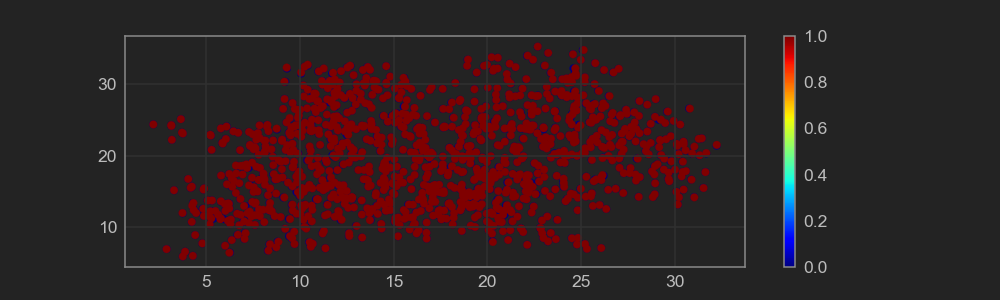

<IPython.core.display.Javascript object>


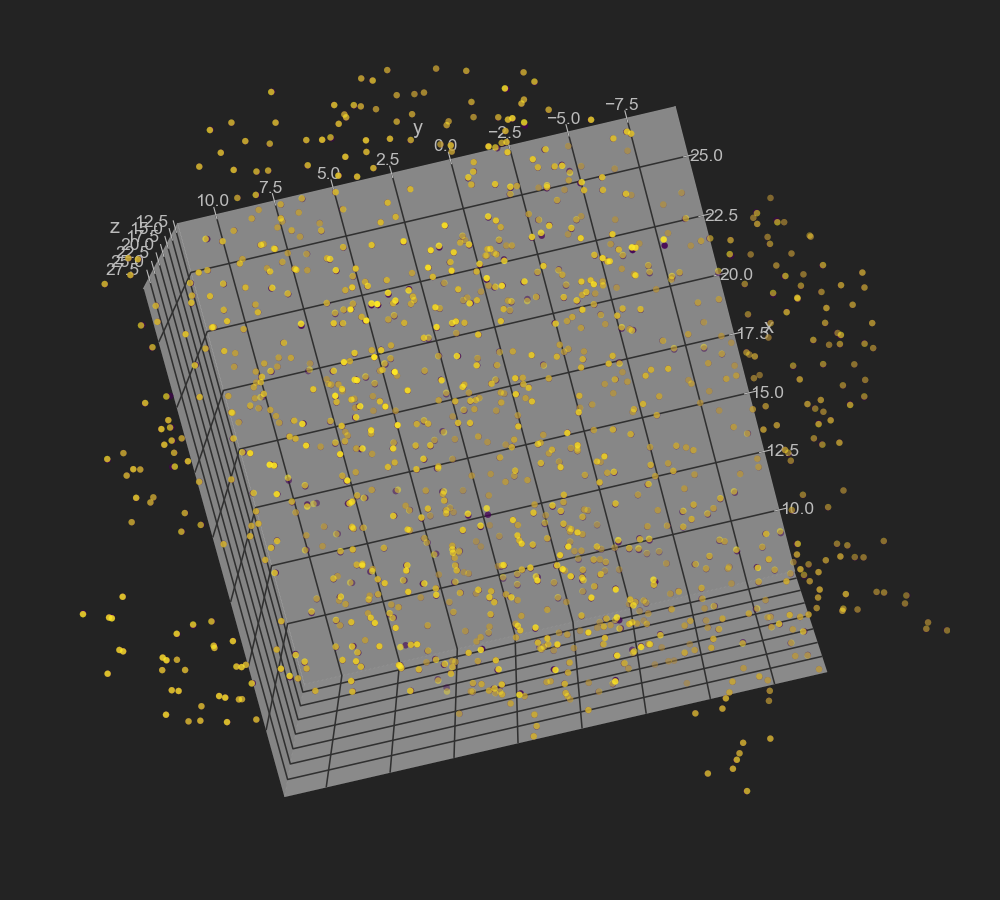

In [45]:
%matplotlib notebook
from matplotlib import colors
from matplotlib import colorbar
print("Color: ", edge_color)

dt = np.array([[coor[1], coor[2], coor[3]] for coor in atoms])
xs = dt[:, 0]
ys = dt[:, 1]
zs = dt[:, 2]
print("xs: ", len(xs))
print("ys: ", len(ys))
print("zs: ", len(zs))
# fig = plt.figure(figsize=(10, 9))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# ax.scatter(xs, ys, zs, c=scalarMap.to_rgba(lbl))

atoms_orig = rd('atoms.txt', 1, 9)
dt_orig = np.array([[coor[1], coor[2], coor[3]] for coor in atoms_orig])
xs = np.append(xs, dt_orig[:, 0]) 
ys = np.append(ys, dt_orig[:, 1])
zs = np.append(zs, dt_orig[:, 2])
print("xs: ", len(xs))
print("ys: ", len(ys))
print("zs: ", len(zs))

#lbl = [0] * len(labels)
#lbl[684] = 1
label_check = np.append(orig_labels, new_labels)
print(label_check)
unique, counts = np.unique(label_check, return_counts=True)
print(np.asarray((unique, counts)).T)

colorsMap='jet'
cm = plt.get_cmap(colorsMap)
scalarMap = cmx.ScalarMappable(norm=colors.Normalize(0, 1), cmap=cm)

plt.figure(figsize=(10, 3))
plt.scatter(xs, zs, c=scalarMap.to_rgba(label_check))
scalarMap.set_array(scalarMap.to_rgba(label_check))
plt.colorbar(scalarMap)
plt.show()

fig = plt.figure(figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(xs, ys, zs, c=label_check)

In [46]:
mas_grad = [0]
tt_grad = [0]
time_start = millis()
tta_grad = []

eng_raw_grad = []
eng_dih_grad = []
eng_ang_grad = []
eng_bonds_grad = []
eng_elst_grad = []
eng_vdw_grad = []

N = 120
l = len(atoms)
h = 0.015
h_old = [1, 1, 1]
S = 0

x_0 = []
y_0 = []
z_0 = []

x_1 = []
y_1 = []
z_1 = []

v_old = [[0,0,0] for i in range(0,l)]

E_old = grad_energy.E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh)
for k in range(0,N):
	v = grad_energy.E_d(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh)
	v = - np.array(v) / np.linalg.norm(v)
	for nm in range(0,l): #l
		for coor in range(0,3):
			atoms[nm][coor + 1] = atoms[nm][coor + 1] + v[nm][coor] * h
			if (v_old[nm][coor] <= v[nm][coor]):
				h = h - h * 0.2
			else :
				h = 0.015
			v_old[nm][coor] = v[nm][coor]
	E_E = grad_energy.E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh)
	S = S + E_old.E - E_E.E
	mas_grad.append(S)
	E_old = E_E
	
	logger.debug("Full molecula energy raw: {0} \n\tDihedrals: {1}\n\tAngles: {2}\n\tBonds: {3}\n\tElst: {4}\n\tVdw: {4}"
				 .format(E_E.E, E_E.dih, E_E.ang, E_E.bond, E_E.elst, E_E.vdw))
	eng_raw_grad.append(E_E.E)
	eng_dih_grad.append(E_E.dih)
	eng_ang_grad.append(E_E.ang)
	eng_bonds_grad.append(E_E.bond)
	eng_elst_grad.append(E_E.elst)
	eng_vdw_grad.append(E_E.vdw)
	
	time_now = millis()
	ttm = (time_now - time_start) / 60000
	tt_grad.append(ttm)
	tta_grad.append(time_now)

	logger.info(Fore.GREEN + "№ Iteration {}; Energy {}; Time (min) {}".format(k, S, ttm) + Fore.RESET)


1525236722882 1525191142034


<IPython.core.display.Javascript object>


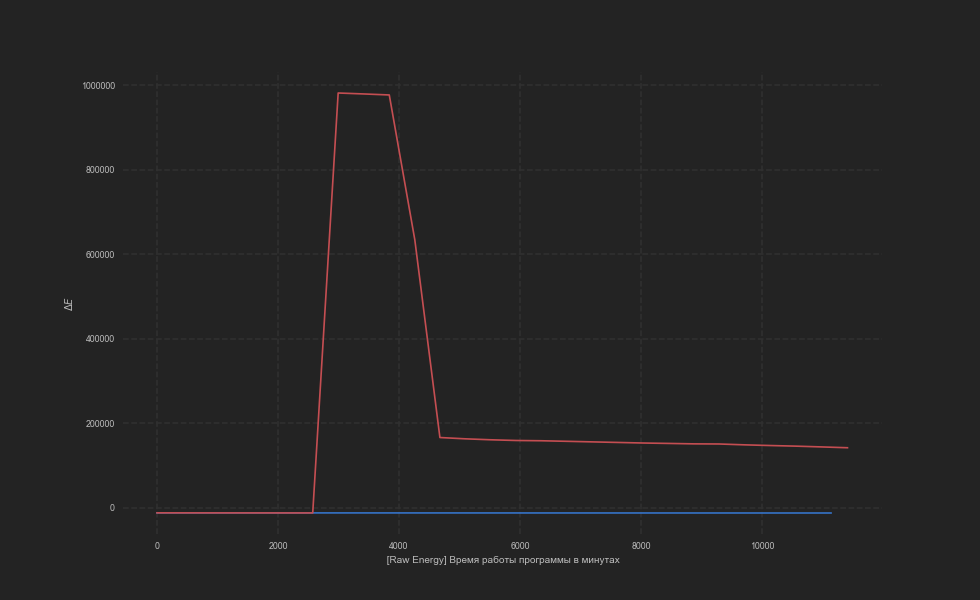

In [79]:
%matplotlib notebook
tt_0 = min(tt_checkpoint)
tt_1 = min(tta_grad)
print(tt_0, tt_1)
time_when = np.array([(t-tt_0)/1000.0 for t in tt_checkpoint])
time_diff = np.array([(t-tt_1)/1000.0 for t in tta_grad])

plt.figure(figsize=(9.8,6))
plt.plot(time_diff, np.array(eng_raw_grad), 'b', time_when, np.array(eng_raw), 'r')
plt.xlabel(r" [Raw Energy] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)

120 14000


<IPython.core.display.Javascript object>


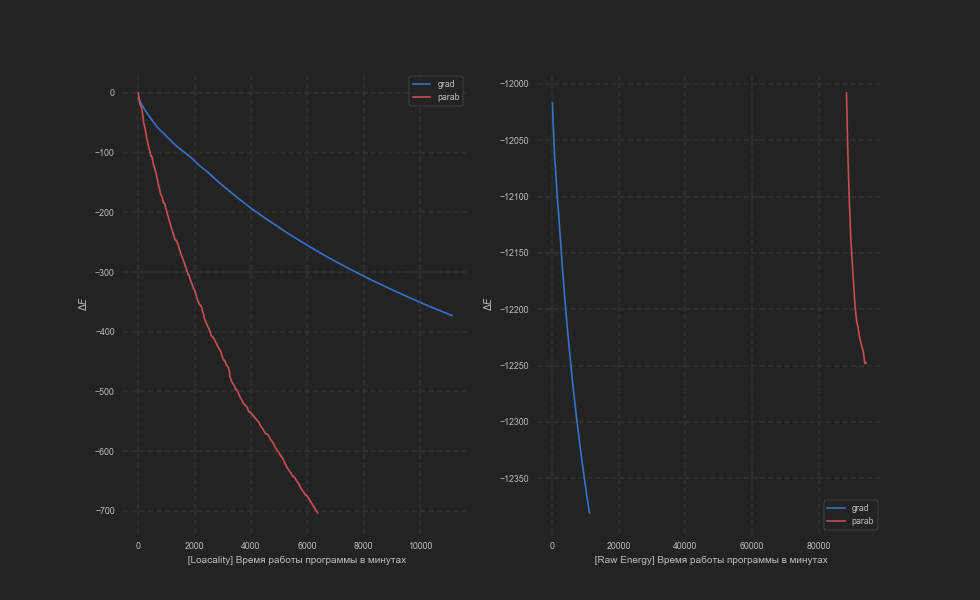

<IPython.core.display.Javascript object>


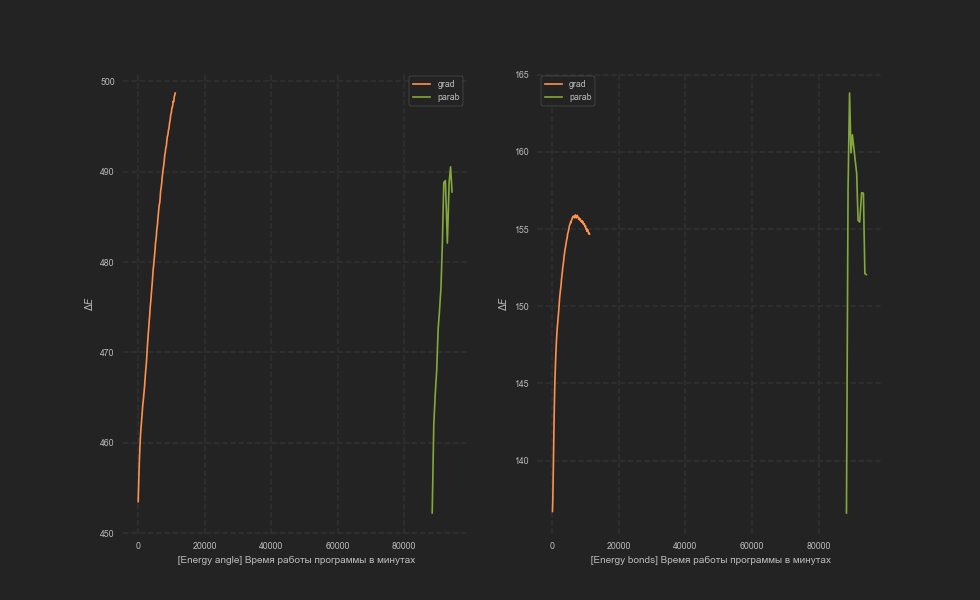

<IPython.core.display.Javascript object>


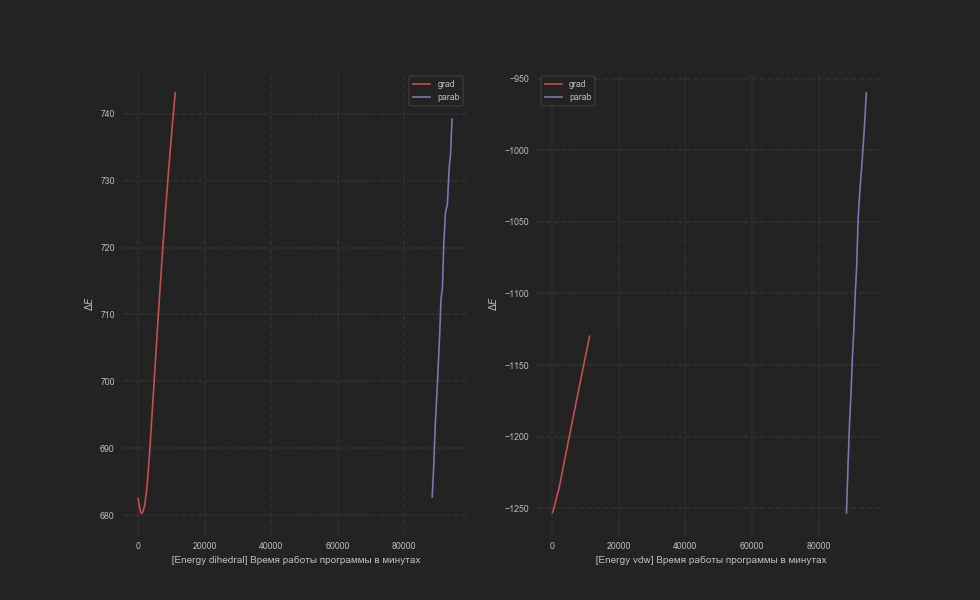

<IPython.core.display.Javascript object>


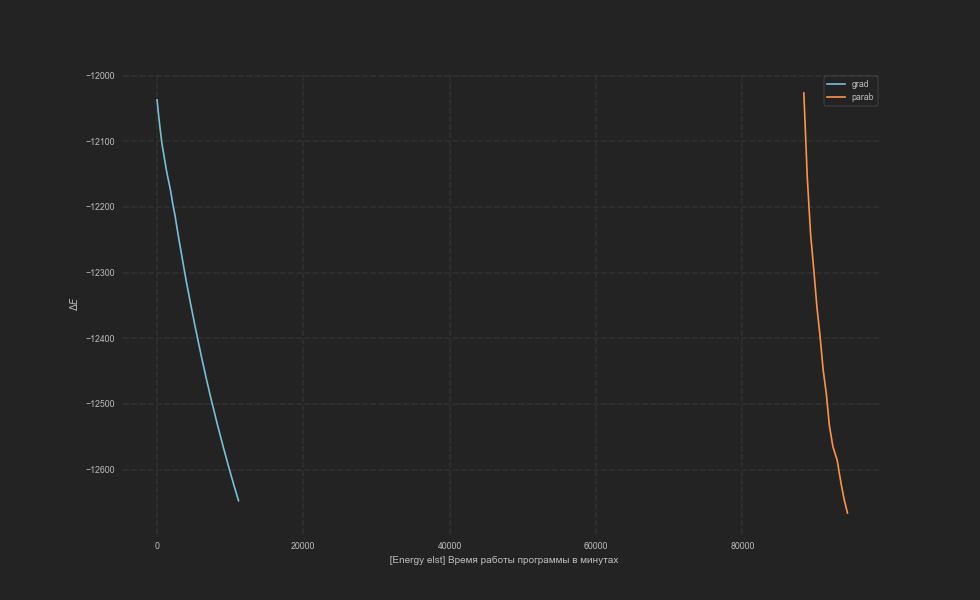

In [76]:
%matplotlib notebook

jtplot.style(theme='monokai', fscale=0.6, spines=False, gridlines='--')
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# mmas_orig = - np.array(mas_orig)

mmas = - np.array(mas_grad[1:])
mmas_orig = - np.array(mas)
tt_2 = min(tta)
time_when = np.array([(t-tt_0)/1000.0 for t in tt_checkpoint])
time_diff = np.array([(t-tt_1)/1000.0 for t in tta_grad])
time_diff_orig = np.array([(t-tt_2)/1000.0 for t in tta])

print(len(time_diff), len(time_diff_orig))
plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_diff, mmas, 'b', label='grad')
plt.plot(time_diff_orig, mmas_orig, 'r', label='parab')
plt.xlabel(r" [Loacality] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_diff, np.array(eng_raw_grad), 'b',  label='grad')
plt.plot(time_when, np.array(eng_raw), 'r', label='parab')
plt.xlabel(r" [Raw Energy] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_diff, np.array(eng_ang_grad), 'y',  label='grad')
plt.plot(time_when, np.array(eng_ang), 'g', label='parab')
plt.xlabel(r" [Energy angle] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_diff, np.array(eng_bonds_grad), 'y',  label='grad')
plt.plot(time_when, np.array(eng_bonds), 'g', label='parab')
plt.xlabel(r" [Energy bonds] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.subplot(1, 2, 1)
plt.plot(time_diff, np.array(eng_dih_grad), 'r',  label='grad')
plt.plot(time_when, np.array(eng_dih), 'm', label='parab')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r" [Energy dihedral] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time_diff, np.array(eng_vdw_grad), 'r',   label='grad')
plt.plot(time_when, np.array(eng_vdw), 'm', label='parab')
plt.xlabel(r" [Energy vdw] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(9.8,6))
plt.plot(time_diff, np.array(eng_elst_grad), 'c',   label='grad')
plt.plot(time_when, np.array(eng_elst), 'y', label='parab')
plt.xlabel(r" [Energy elst] Время работы программы в минутах")
plt.ylabel(r"$\Delta E$ ")
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


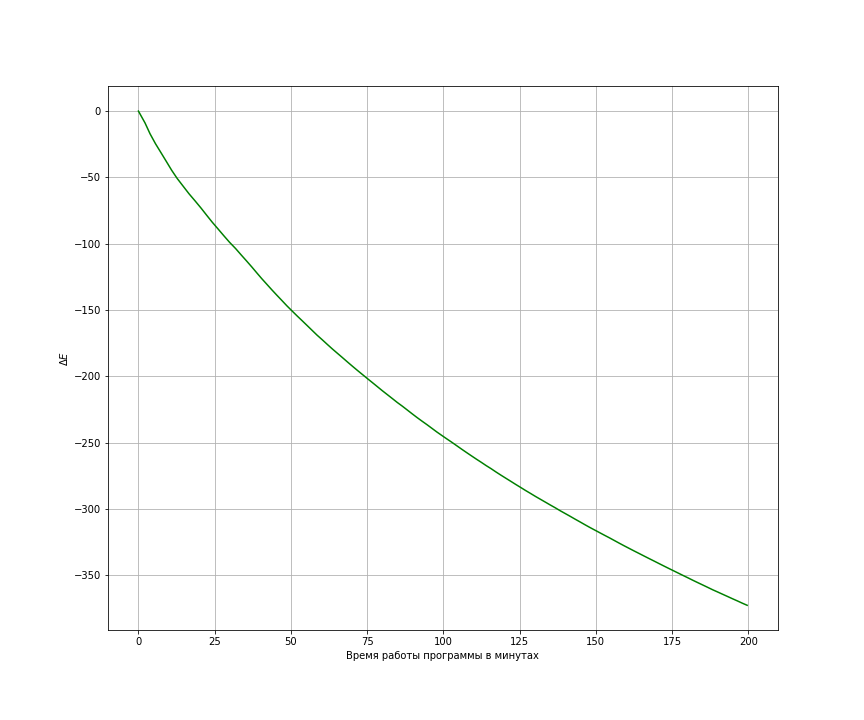

In [18]:
import matplotlib.pyplot as plt

# mmas = - np.array(mas)
mmas_grad = - np.array(mas_grad)

plt.figure(figsize=(12,10))
# tt, mmas, 'b',
plt.plot( tt_grad, mmas_grad, 'g')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.show()

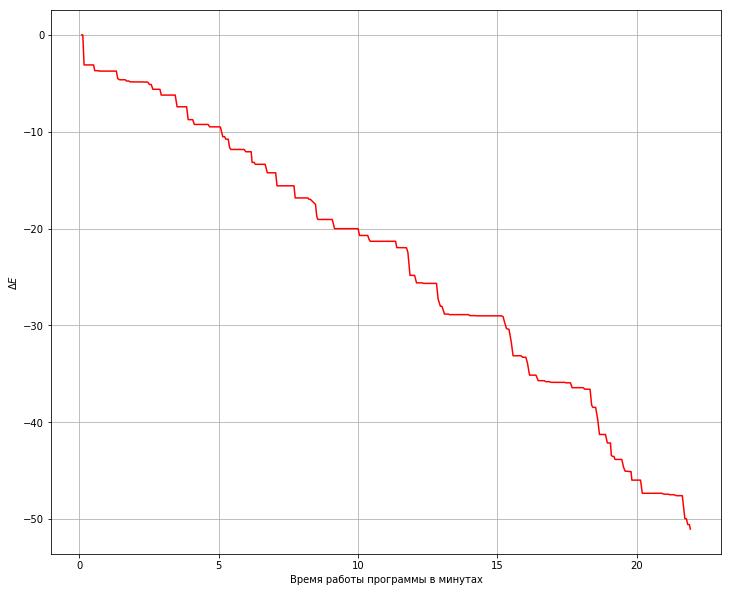

In [11]:
import matplotlib.pyplot as plt

# mmas = - np.array(mas)
mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
# tt, mmas, 'b',
plt.plot( tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.show()

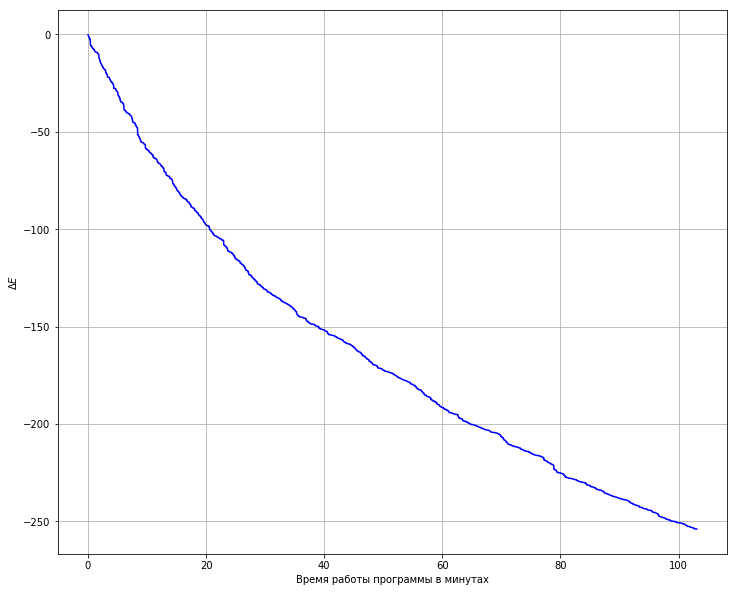

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

mmas = - np.array(mas)
# mmas_orig = - np.array(mas_orig)

plt.figure(figsize=(12,10))
plt.plot(tt, mmas, 'b')#, tt_orig, mmas_orig, 'r')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.show()

In [43]:
print(E_E)

eng(E=-12380.89063643336, dih=743.107035998845, ang=498.6890545390018, bond=154.6780712983359, elst=-12647.487056462895, vdw=-1129.8777418066468)


<IPython.core.display.Javascript object>


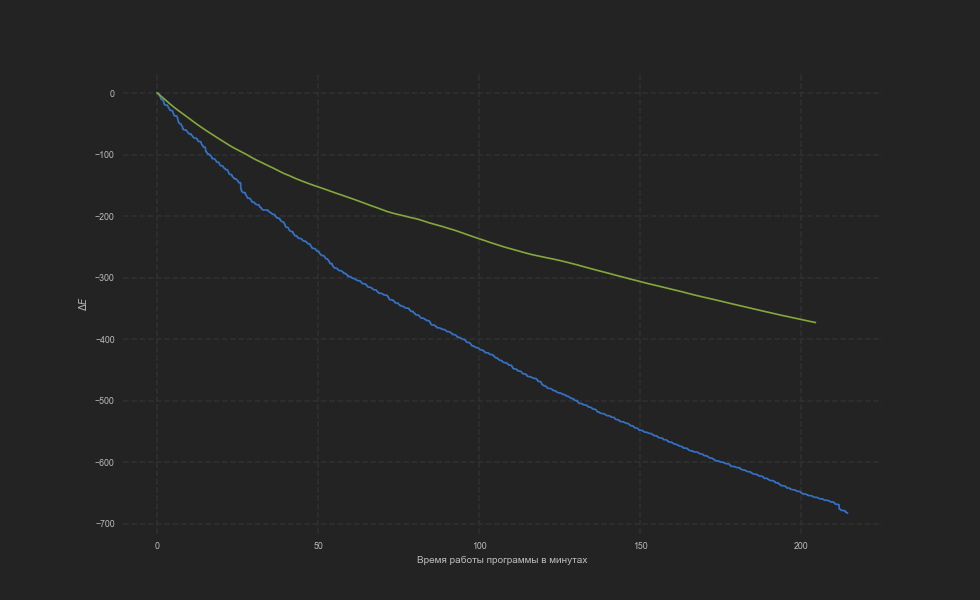

In [42]:
import matplotlib.pyplot as plt

mmas = - np.array(mas)
mmas_grad = - np.array(mas_grad)


plt.figure(figsize=(9.8,6))
plt.plot(tt, mmas, 'b', tt_grad, mmas_grad, 'g')
plt.xlabel(r"Время работы программы в минутах")
plt.ylabel(r"$\Delta E$")
plt.grid(True)
plt.interactive(False)
plt.show()

Energy:  -32.55971244386966


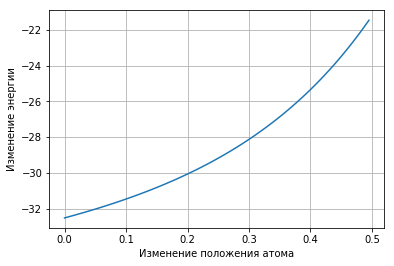

-21.47003065706592


In [13]:
num = 280
coor = 2
h = 0.005
M = 100
mmm = []
ccc = []

print("Energy: ", E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True))

# print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm))
for k in range(0, M):
    atoms[num][coor] = atoms[num][coor] + h
    EE = E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, 
           num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True) 
    # E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm)
    mmm.append(EE)
    ccc.append(k*h)  

import matplotlib.pyplot as plt
plt.plot(ccc, mmm)
plt.ylabel(r"Изменение энергии")
plt.xlabel(r"Изменение положения атома")
plt.grid(True)
plt.show()
    
print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh, num, nghb_d, nghb_a, nghb_b, nghb_nb, full=True))

# print(E(atoms, dihedrals, angles, bonds, neighbours, two_bonds_neigh, three_bonds_neigh,nm))